Data Set Information:



The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

The aim is to identify subsets of proteins that are discriminant between the classes.



1 Mouse ID
2..78 Values of expression levels of 77 proteins; the names of proteins are followed by â€œ_nâ€ indicating that they were measured in the nuclear fraction. For example: DYRK1A_n
79 Genotype: control (c) or trisomy (t)
80 Treatment type: memantine (m) or saline (s)
81 Behavior: context-shock (CS) or shock-context (SC)
82 Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m



Problem Statement:

Protein Expression classification models are frequently viewed not only as a difficult
task, but also as a classification problem that, in some cases, requires a trade-off
between accuracy and efficiency in analysis validation due to the large amount of data
available.
Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control
and Down syndrome mice exposed to context fear conditioning, a task used to assess
associative learning.
The aim is to identify subsets of proteins that are discriminant between the classes.
Basically, this is multi-class classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [2]:
import os
os.getcwd()

'C:\\Users\\B.Sreenath Reddy\\Music'

In [3]:
os.chdir("D:\Datasets")

In [4]:
df = pd.read_csv("mice_protein.csv")

In [5]:
df

Unnamed: 0   MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N  \
0              0     309_1  0.503644  0.747193  0.430175  2.816329  5.990152   
1              1     309_2  0.514617  0.689064  0.411770  2.789514  5.685038   
2              2     309_3  0.509183  0.730247  0.418309  2.687201  5.622059   
3              3     309_4  0.442107  0.617076  0.358626  2.466947  4.979503   
4              4     309_5  0.434940  0.617430  0.358802  2.365785  4.718679   
...          ...       ...       ...       ...       ...       ...       ...   
1075        1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035   
1076        1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492   
1077        1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852   
1078        1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088   
1079        1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348   

        pAKT_N   pBRAF_N  pCAMKII_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.218830  0.177565   2.373744  ...  0.108336  0.427099   0.114783   
1     0.211636  0.172817   2.292150  ...  0.104315  0.441581   0.111974   
2     0.209011  0.175722   2.283337  ...  0.106219  0.435777   0.111883   
3     0.222886  0.176463   2.152301  ...  0.111262  0.391691   0.130405   
4     0.213106  0.173627   2.134014  ...  0.110694  0.434154   0.118481   
...        ...       ...        ...  ...       ...       ...        ...   
1075  0.211736  0.171262   2.483740  ...  0.183324  0.374088   0.318782   
1076  0.251274  0.182496   2.512737  ...  0.175674  0.375259   0.325639   
1077  0.220665  0.161435   1.989723  ...  0.158296  0.422121   0.321306   
1078  0.208897  0.173623   2.086028  ...  0.196296  0.397676   0.335936   
1079  0.251001  0.191811   2.361816  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 83 columns]

In [6]:
df.head(5)

Unnamed: 0 MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N  \
0           0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152   
1           1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038   
2           2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059   
3           3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503   
4           4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679   

     pAKT_N   pBRAF_N  pCAMKII_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.218830  0.177565   2.373744  ...  0.108336  0.427099   0.114783   
1  0.211636  0.172817   2.292150  ...  0.104315  0.441581   0.111974   
2  0.209011  0.175722   2.283337  ...  0.106219  0.435777   0.111883   
3  0.222886  0.176463   2.152301  ...  0.111262  0.391691   0.130405   
4  0.213106  0.173627   2.134014  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 83 columns]

In [7]:
df.size

89640

In [8]:
df.shape

(1080, 83)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1080 non-null   int64  
 1   MouseID          1080 non-null   object 
 2   DYRK1A_N         1077 non-null   float64
 3   ITSN1_N          1077 non-null   float64
 4   BDNF_N           1077 non-null   float64
 5   NR1_N            1077 non-null   float64
 6   NR2A_N           1077 non-null   float64
 7   pAKT_N           1077 non-null   float64
 8   pBRAF_N          1077 non-null   float64
 9   pCAMKII_N        1077 non-null   float64
 10  pCREB_N          1077 non-null   float64
 11  pELK_N           1077 non-null   float64
 12  pERK_N           1077 non-null   float64
 13  pJNK_N           1077 non-null   float64
 14  PKCA_N           1077 non-null   float64
 15  pMEK_N           1077 non-null   float64
 16  pNR1_N           1077 non-null   float64
 17  pNR2A_N       

In [10]:
 ds = df.describe()

In [11]:
ds

Unnamed: 0     DYRK1A_N      ITSN1_N       BDNF_N        NR1_N  \
count  1080.00000  1077.000000  1077.000000  1077.000000  1077.000000   
mean    539.50000     0.425810     0.617102     0.319088     2.297269   
std     311.91345     0.249362     0.251640     0.049383     0.347293   
min       0.00000     0.145327     0.245359     0.115181     1.330831   
25%     269.75000     0.288121     0.473361     0.287444     2.057411   
50%     539.50000     0.366378     0.565782     0.316564     2.296546   
75%     809.25000     0.487711     0.698032     0.348197     2.528481   
max    1079.00000     2.516367     2.602662     0.497160     3.757641   

            NR2A_N       pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      3.843934     0.233168     0.181846     3.537109     0.212574  ...   
std       0.933100     0.041634     0.027042     1.295169     0.032587  ...   
min       1.737540     0.063236     0.064043     1.343998     0.112812  ...   
25%       3.155678     0.205755     0.164595     2.479834     0.190823  ...   
50%       3.760855     0.231177     0.182302     3.326520     0.210594  ...   
75%       4.440011     0.257261     0.197418     4.481940     0.234595  ...   
max       8.482553     0.539050     0.317066     7.464070     0.306247  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 78 columns]

In [12]:
df.describe(include='object')

MouseID Genotype  Treatment Behavior   class
count     1080     1080       1080     1080    1080
unique    1080        2          2        2       8
top      309_1  Control  Memantine      S/C  c-CS-m
freq         1      570        570      555     150

In [13]:
df['class'].value_counts(normalize=True) #Classes déséquilibrées


c-CS-m    0.138889
c-SC-m    0.138889
c-CS-s    0.125000
c-SC-s    0.125000
t-CS-m    0.125000
t-SC-m    0.125000
t-SC-s    0.125000
t-CS-s    0.097222
Name: class, dtype: float64

In [101]:
df['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [14]:
df.isnull().sum()

Unnamed: 0    0
MouseID       0
DYRK1A_N      3
ITSN1_N       3
BDNF_N        3
             ..
CaNA_N        0
Genotype      0
Treatment     0
Behavior      0
class         0
Length: 83, dtype: int64

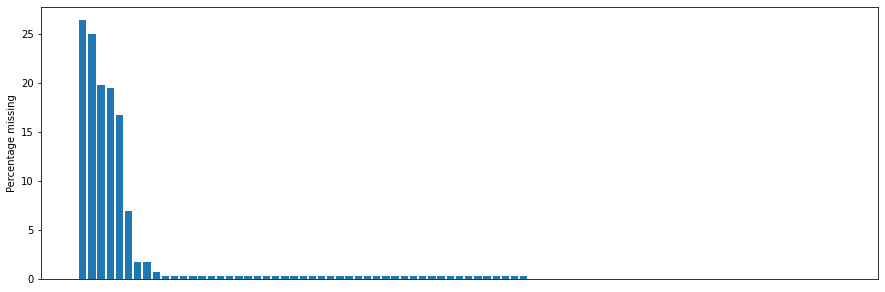

In [15]:
fig, ax = plt.subplots(figsize=(15,5))

null = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(null.index, null.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()


In [17]:
df.isnull().any()

Unnamed: 0    False
MouseID       False
DYRK1A_N       True
ITSN1_N        True
BDNF_N         True
              ...  
CaNA_N        False
Genotype      False
Treatment     False
Behavior      False
class         False
Length: 83, dtype: bool

In [18]:
df1 = df.drop(columns = ["MouseID"])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1080 non-null   int64  
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

 CHECKING FOR NULL VALUES

In [20]:
for col_name, null_val in zip(df1.isnull().sum().index,df1.isnull().sum()):
    if null_val>0:
        print(col_name,' :', null_val)


DYRK1A_N  : 3
ITSN1_N  : 3
BDNF_N  : 3
NR1_N  : 3
NR2A_N  : 3
pAKT_N  : 3
pBRAF_N  : 3
pCAMKII_N  : 3
pCREB_N  : 3
pELK_N  : 3
pERK_N  : 3
pJNK_N  : 3
PKCA_N  : 3
pMEK_N  : 3
pNR1_N  : 3
pNR2A_N  : 3
pNR2B_N  : 3
pPKCAB_N  : 3
pRSK_N  : 3
AKT_N  : 3
BRAF_N  : 3
CAMKII_N  : 3
CREB_N  : 3
ELK_N  : 18
ERK_N  : 3
GSK3B_N  : 3
JNK_N  : 3
MEK_N  : 7
TRKA_N  : 3
RSK_N  : 3
APP_N  : 3
Bcatenin_N  : 18
SOD1_N  : 3
MTOR_N  : 3
P38_N  : 3
pMTOR_N  : 3
DSCR1_N  : 3
AMPKA_N  : 3
NR2B_N  : 3
pNUMB_N  : 3
RAPTOR_N  : 3
TIAM1_N  : 3
pP70S6_N  : 3
BAD_N  : 213
BCL2_N  : 285
pCFOS_N  : 75
H3AcK18_N  : 180
EGR1_N  : 210
H3MeK4_N  : 270


In [21]:
df1.select_dtypes(include='object').isnull().sum()

Genotype     0
Treatment    0
Behavior     0
class        0
dtype: int64

In [22]:
for col in df1.select_dtypes(include='object'):
    print(col, '-', df1[col].unique())


Genotype - ['Control' 'Ts65Dn']
Treatment - ['Memantine' 'Saline']
Behavior - ['C/S' 'S/C']
class - ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


In [23]:
df1['Genotype']=df1['Genotype'].map({'Control':0, 'Ts65Dn':1})
df1['Treatment']=df1['Treatment'].map({'Saline':0, 'Memantine':1})
df1['Behavior']=df1['Behavior'].map({'C/S':0, 'S/C':1 })


In [24]:
df1

Unnamed: 0  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0              0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1              1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2              2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3              3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4              4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...          ...       ...       ...       ...       ...       ...       ...   
1075        1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076        1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077        1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078        1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079        1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652         0          1         0  c-CS-m  
1     0.135103  0.131119  1.743610         0          1         0  c-CS-m  
2     0.133362  0.127431  1.926427         0          1         0  c-CS-m  
3     0.147444  0.146901  1.700563         0          1         0  c-CS-m  
4     0.140314  0.148380  1.839730         0          1         0  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823         1          0         1  t-SC-s  
1076  0.200415  0.293435  1.364478         1          0         1  t-SC-s  
1077  0.229193  0.355213  1.430825         1          0         1  t-SC-s  
1078  0.251317  0.365353  1.404031         1          0         1  t-SC-s  
1079  0.252995  0.365278  1.370999         1          0         1  t-SC-s  

[1080 rows x 82 columns]

LABEL ENCODER

In [25]:
from sklearn.preprocessing import LabelEncoder

lben = LabelEncoder()

df1['class'] =lben.fit_transform(df1['class'])

In [26]:
df1['class'].unique()

array([0, 2, 1, 3, 4, 6, 5, 7])

In [102]:
df1['class'].value_counts()

0    150
2    150
1    135
3    135
4    135
6    135
7    135
5    105
Name: class, dtype: int64

In [27]:
df1

Unnamed: 0  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0              0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1              1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2              2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3              3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4              4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...          ...       ...       ...       ...       ...       ...       ...   
1075        1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076        1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077        1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078        1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079        1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0     0.131790  0.128186  1.675652         0          1         0      0  
1     0.135103  0.131119  1.743610         0          1         0      0  
2     0.133362  0.127431  1.926427         0          1         0      0  
3     0.147444  0.146901  1.700563         0          1         0      0  
4     0.140314  0.148380  1.839730         0          1         0      0  
...        ...       ...       ...       ...        ...       ...    ...  
1075  0.204660  0.328327  1.364823         1          0         1      7  
1076  0.200415  0.293435  1.364478         1          0         1      7  
1077  0.229193  0.355213  1.430825         1          0         1      7  
1078  0.251317  0.365353  1.404031         1          0         1      7  
1079  0.252995  0.365278  1.370999         1          0         1      7  

[1080 rows x 82 columns]

In [28]:
from sklearn.impute import KNNImputer


In [29]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df1) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=new_array, columns=df1.columns)

In [30]:
new_data

Unnamed: 0  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0            0.0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1            1.0  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2            2.0  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3            3.0  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4            4.0  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...          ...       ...       ...       ...       ...       ...       ...   
1075      1075.0  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076      1076.0  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077      1077.0  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078      1078.0  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079      1079.0  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  class  
0     0.131790  0.128186  1.675652       0.0        1.0       0.0    0.0  
1     0.135103  0.131119  1.743610       0.0        1.0       0.0    0.0  
2     0.133362  0.127431  1.926427       0.0        1.0       0.0    0.0  
3     0.147444  0.146901  1.700563       0.0        1.0       0.0    0.0  
4     0.140314  0.148380  1.839730       0.0        1.0       0.0    0.0  
...        ...       ...       ...       ...        ...       ...    ...  
1075  0.204660  0.328327  1.364823       1.0        0.0       1.0    7.0  
1076  0.200415  0.293435  1.364478       1.0        0.0       1.0    7.0  
1077  0.229193  0.355213  1.430825       1.0        0.0       1.0    7.0  
1078  0.251317  0.365353  1.404031       1.0        0.0       1.0    7.0  
1079  0.252995  0.365278  1.370999       1.0        0.0       1.0    7.0  

[1080 rows x 82 columns]

In [79]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1080 non-null   float64
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR2B_N       

In [31]:
for col_name, null_val in zip(new_data.isnull().sum().index,new_data.isnull().sum()):
    if null_val>0:
        print(col_name,' :', null_val)

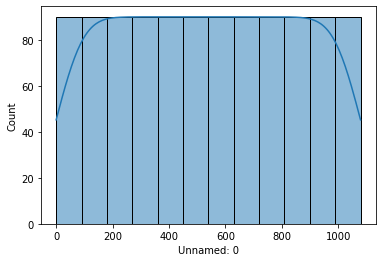

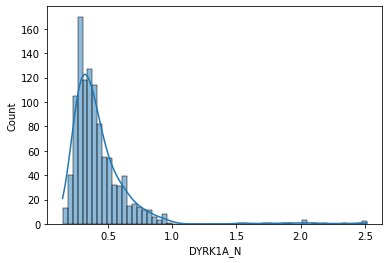

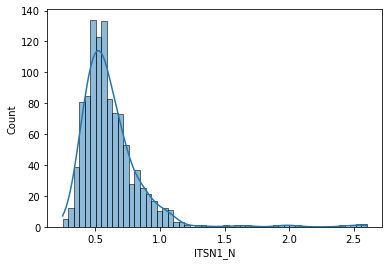

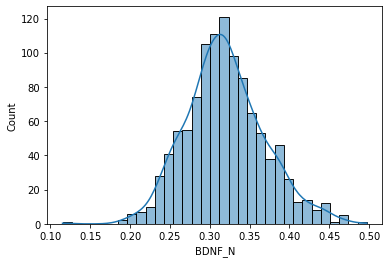

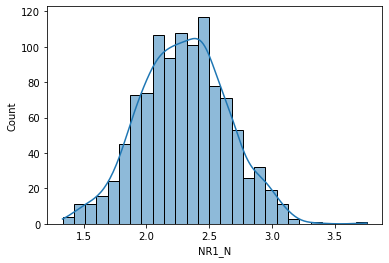

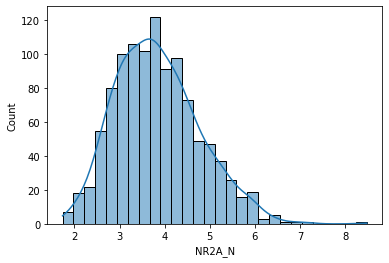

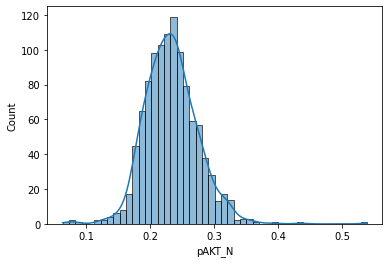

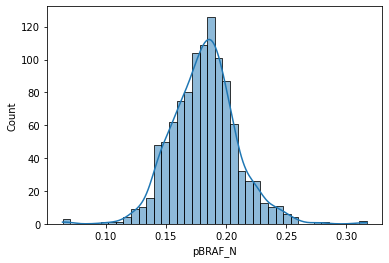

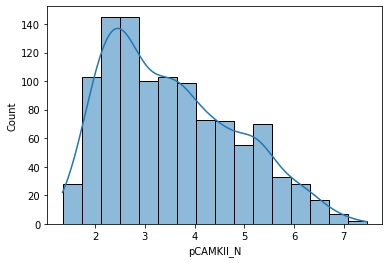

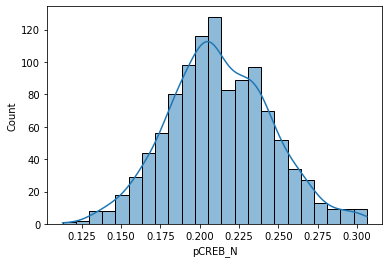

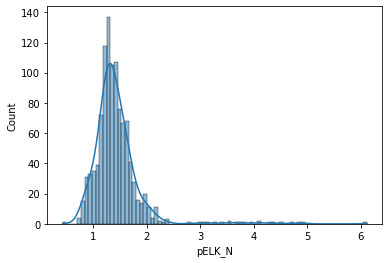

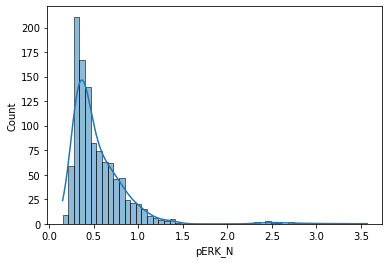

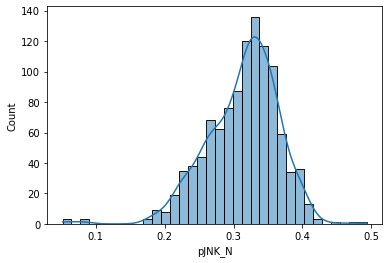

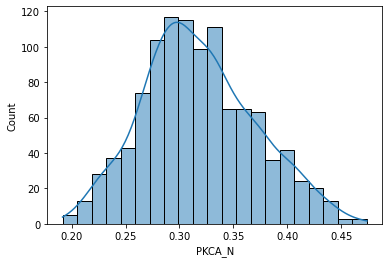

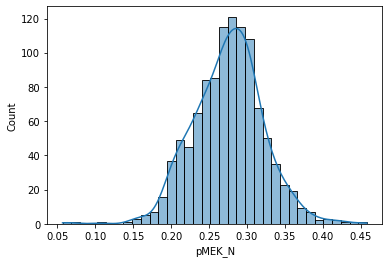

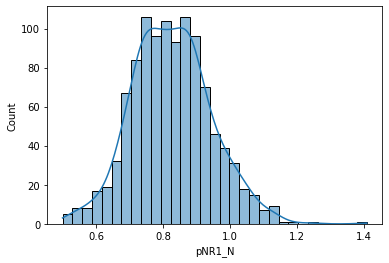

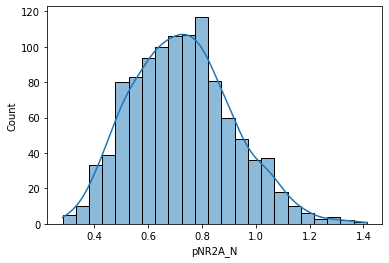

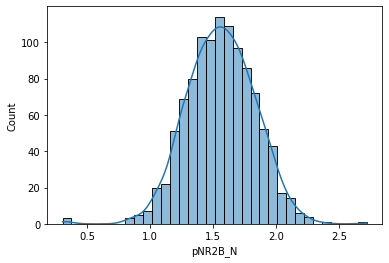

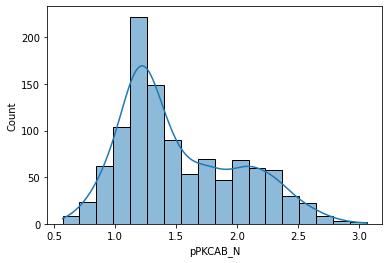

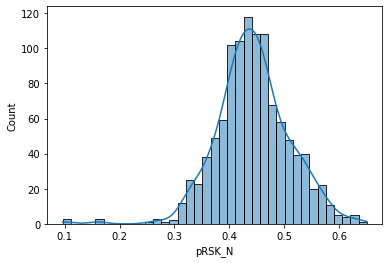

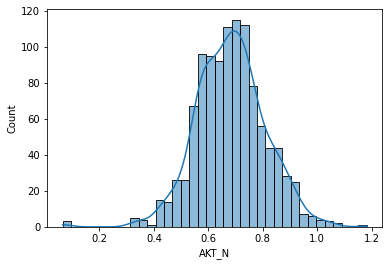

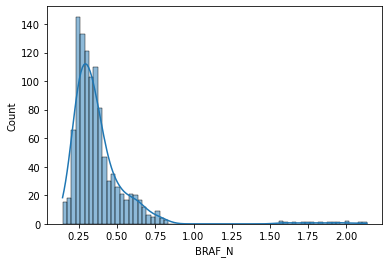

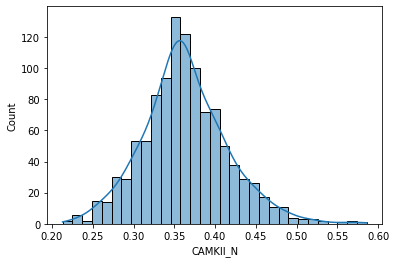

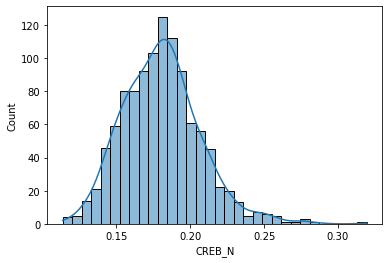

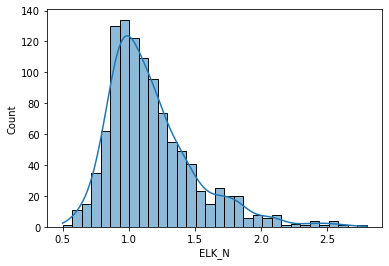

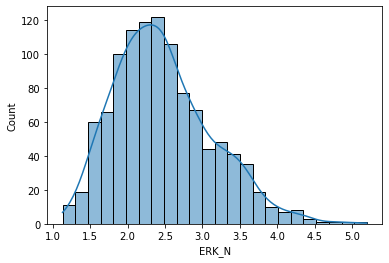

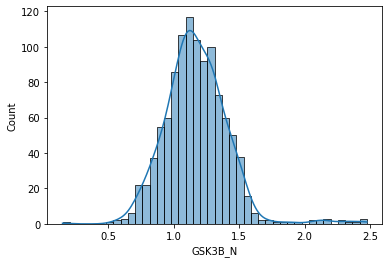

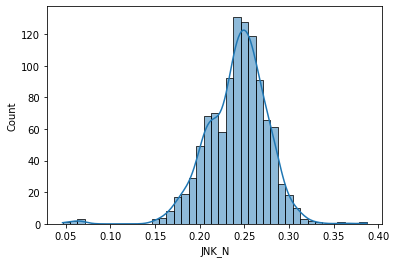

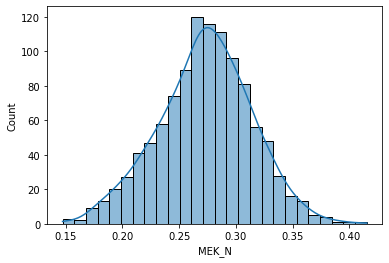

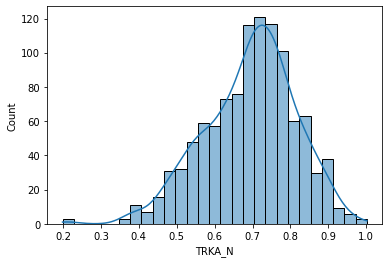

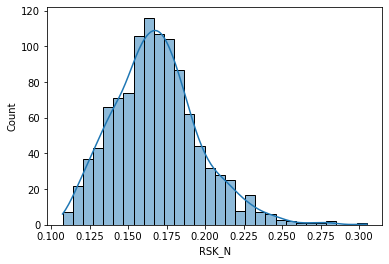

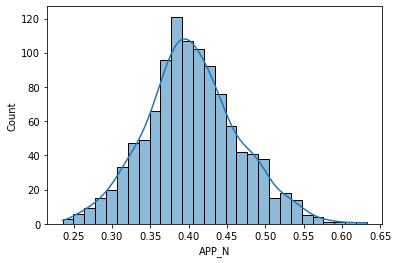

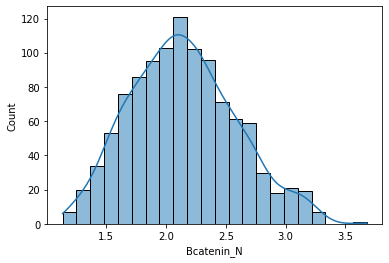

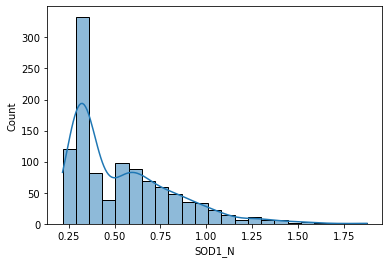

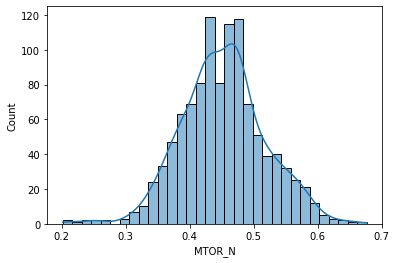

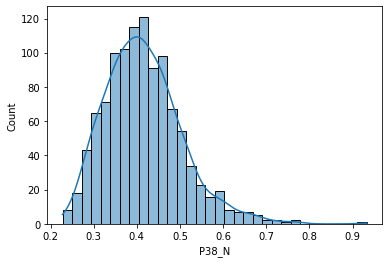

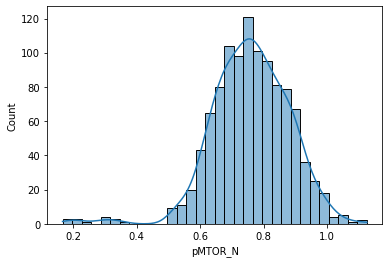

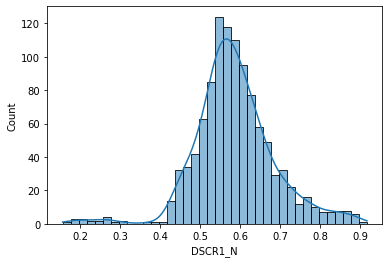

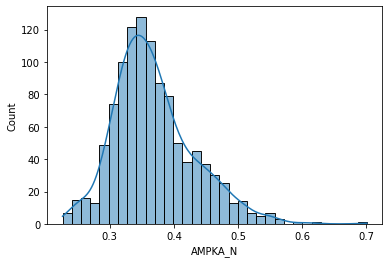

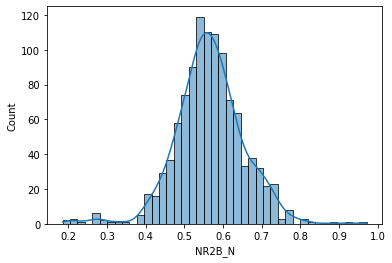

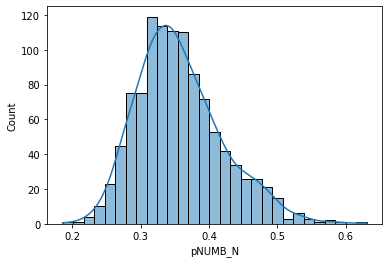

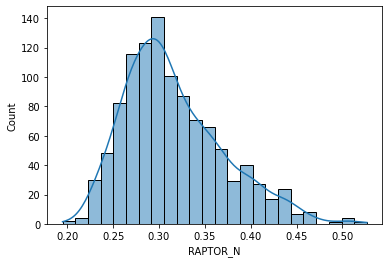

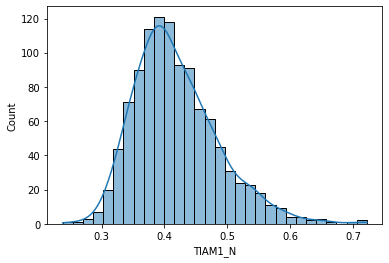

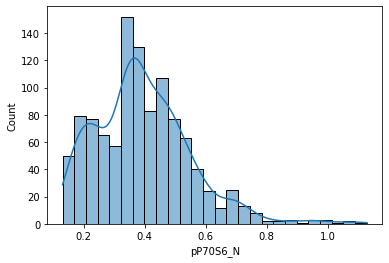

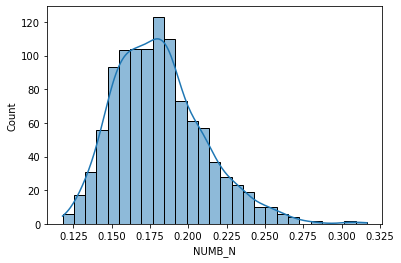

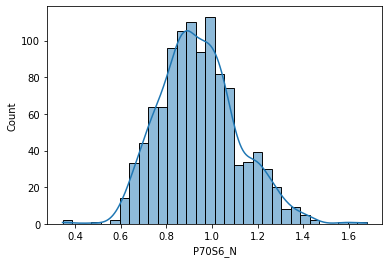

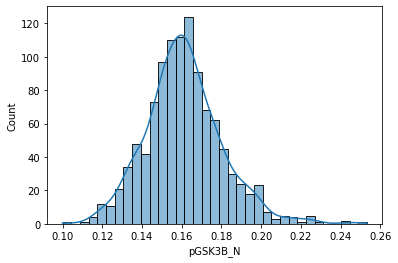

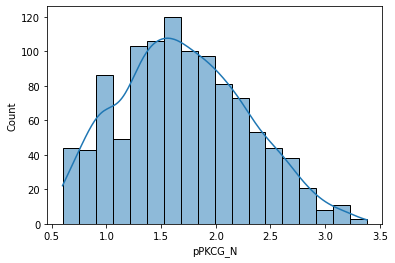

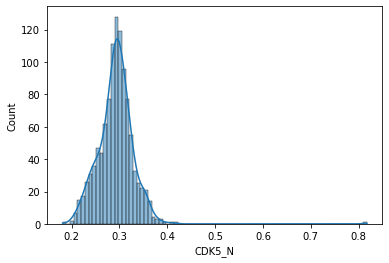

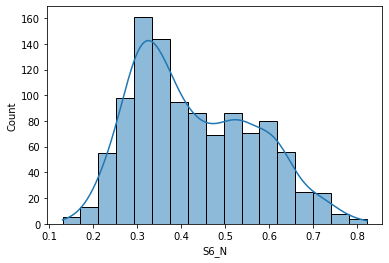

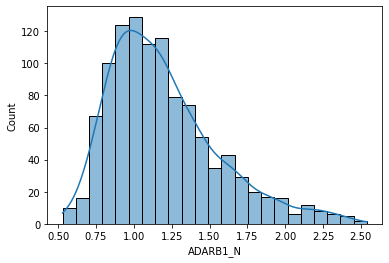

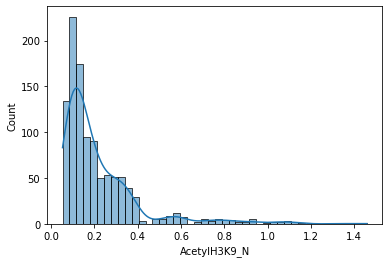

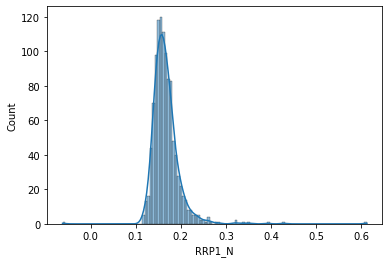

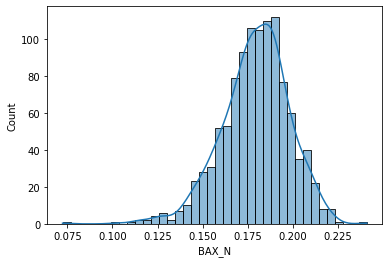

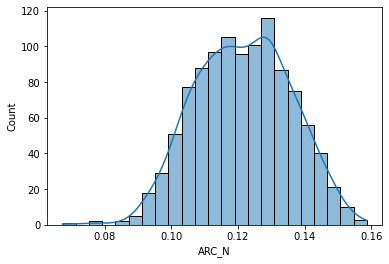

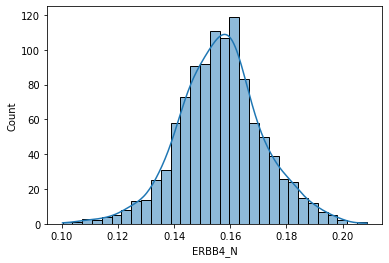

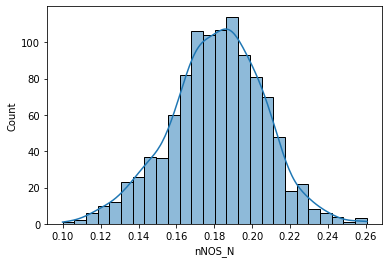

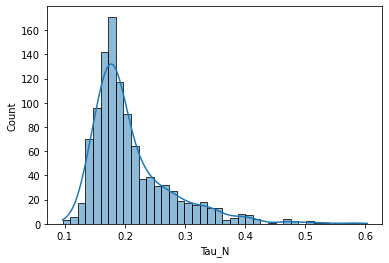

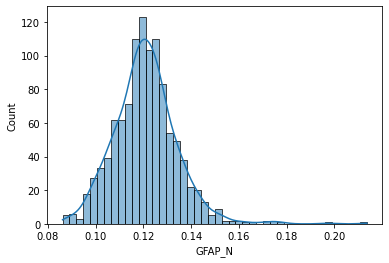

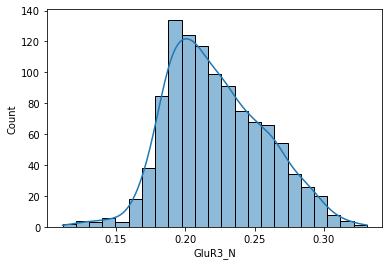

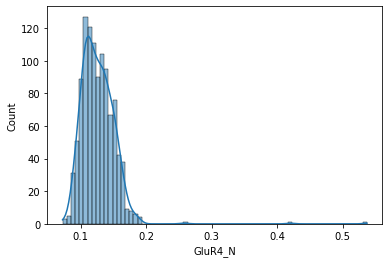

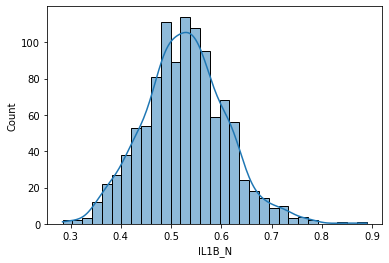

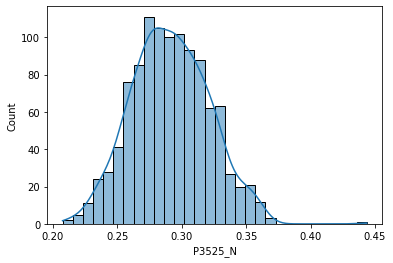

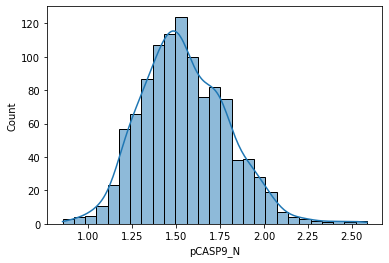

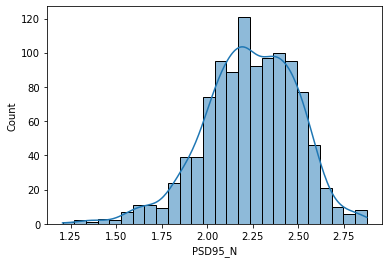

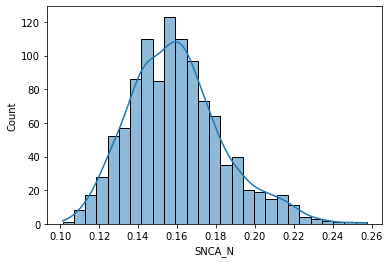

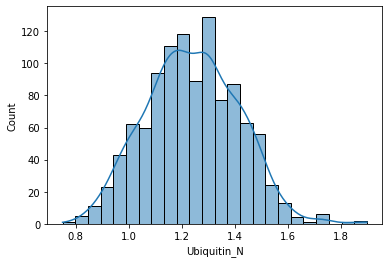

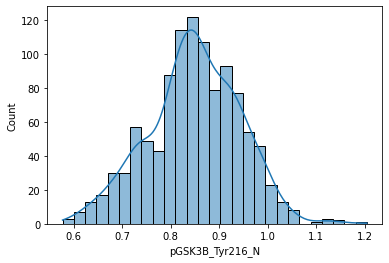

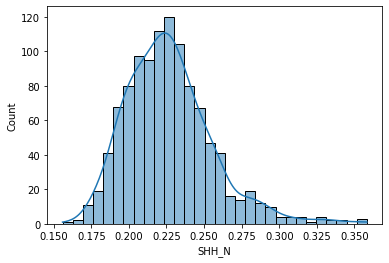

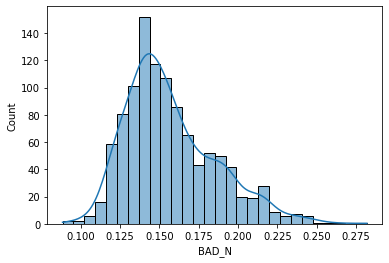

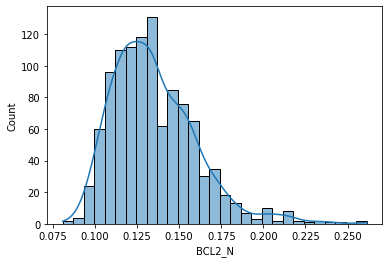

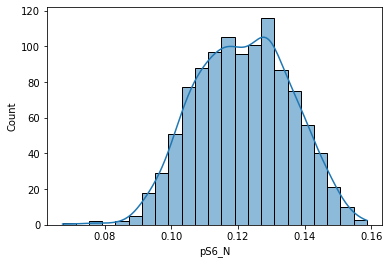

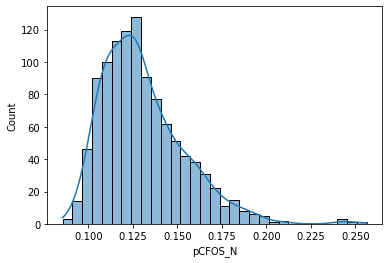

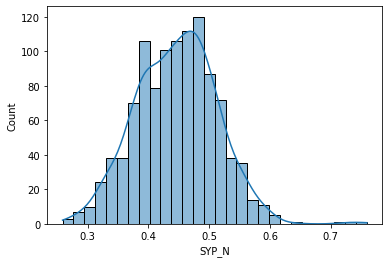

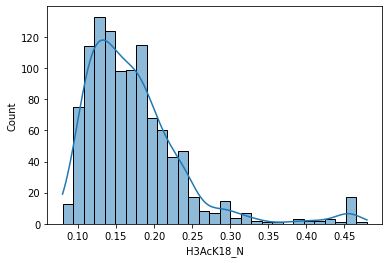

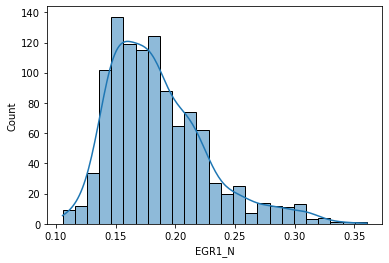

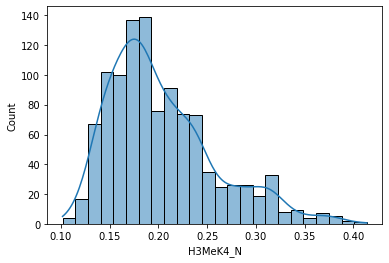

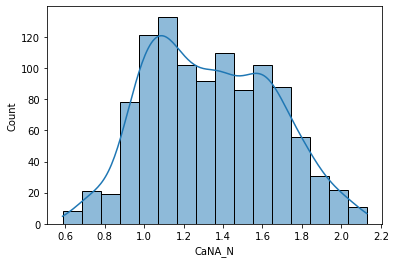

In [32]:
for feature in new_data.columns[:-4]:
    sns.histplot(data=new_data[feature], kde=True)
    plt.show()

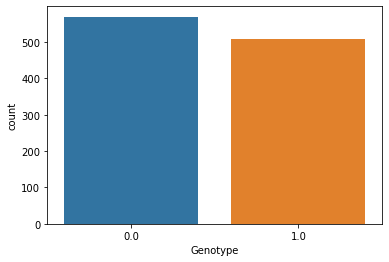

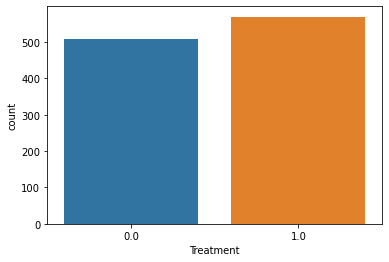

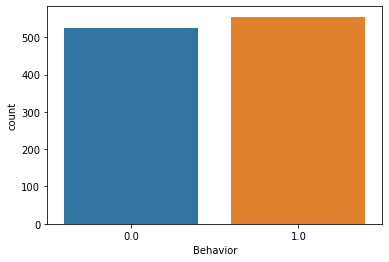

In [33]:
for feature in new_data.columns[-4:-1]:
    sns.countplot(x=new_data[feature])
    plt.show()


<AxesSubplot:xlabel='class', ylabel='count'>

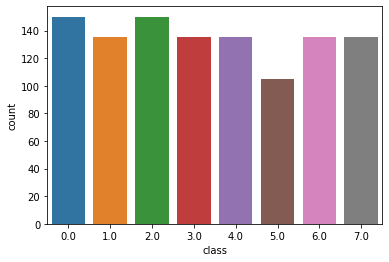

In [34]:
sns.countplot(x=new_data['class'])


In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [126]:
scaler_stan=StandardScaler()
scaled_data1=scaler_stan.fit_transform(new_data)

In [37]:
scaled_data1=pd.DataFrame(scaled_data1, columns=new_data)
scaled_data1=pd.concat([scaled_data1, new_data.iloc[:, -4:-1]], axis=1)


In [89]:
scaled_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1080 non-null   float64
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR2B_N       

In [90]:
scaled_data1

Unnamed: 0  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0      -1.730448  0.313061  0.517754  2.252039  1.497356  2.304442 -0.346389   
1      -1.727240  0.357147  0.286330  1.878799  1.420029  1.977027 -0.519421   
2      -1.724033  0.335315  0.450288  2.011395  1.124980  1.909444 -0.582565   
3      -1.720825  0.065832 -0.000263  0.801075  0.489815  1.219924 -0.248835   
4      -1.717618  0.037040  0.001145  0.804642  0.198085  0.940035 -0.484068   
...          ...       ...       ...       ...       ...       ...       ...   
1075    1.717618 -0.686441 -0.611311 -1.303228 -0.591216 -1.333463 -0.517029   
1076    1.720825 -0.616787 -0.569223 -1.368584 -0.391346 -1.117282  0.433969   
1077    1.724033 -0.791544 -0.883670 -1.723867 -1.626201 -1.740362 -0.302248   
1078    1.727240 -0.821503 -0.813144 -1.523993 -1.213349 -1.565195 -0.585312   
1079    1.730448 -0.494541 -0.621392 -1.268673 -0.589173 -1.339566  0.427419   

       pBRAF_N  pCAMKII_N   pCREB_N  ...     pS6_N   pCFOS_N     SYP_N  \
0    -0.159675  -0.900120  0.600260  ... -1.066276 -0.955547 -0.285744   
1    -0.335553  -0.963208  0.439099  ... -1.046167 -1.128059 -0.067645   
2    -0.227948  -0.970022  0.539591  ... -0.926271 -1.046367 -0.155059   
3    -0.200525  -1.071338 -0.173669  ... -1.285019 -0.829993 -0.818989   
4    -0.305554  -1.085477 -0.629267  ... -1.172895 -0.854367 -0.179502   
...        ...        ...       ...  ...       ...       ...       ...   
1075 -0.393153  -0.815072 -0.164068  ... -0.400501  2.262087 -1.084095   
1076  0.022959  -0.792653  0.112799  ... -0.554066  1.933829 -1.066451   
1077 -0.757133  -1.197041 -0.843880  ... -0.180275  1.188153 -0.360708   
1078 -0.305688  -1.122579 -0.632766  ...  0.264492  2.818683 -0.728860   
1079  0.367975  -0.909343  0.336584  ... -0.183757  2.443672 -0.387434   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  
0     -0.882643 -1.304031 -1.372387  1.065901       0.0        1.0       0.0  
1     -0.925249 -1.223676 -1.318934  1.280291       0.0        1.0       0.0  
2     -0.926623 -1.265907 -1.386138  1.857038       0.0        1.0       0.0  
3     -0.645754 -0.924342 -1.031314  1.144490       0.0        1.0       0.0  
4     -0.826564 -1.097276 -1.004363  1.583530       0.0        1.0       0.0  
...         ...       ...       ...       ...       ...        ...       ...  
1075   2.210741  0.463426  2.275009  0.085303       1.0        0.0       1.0  
1076   2.314729  0.360449  1.639132  0.084215       1.0        0.0       1.0  
1077   2.249013  1.058466  2.764988  0.293525       1.0        0.0       1.0  
1078   2.470867  1.595065  2.949783  0.208996       1.0        0.0       1.0  
1079   2.457608  1.635773  2.948413  0.104788       1.0        0.0       1.0  

[1080 rows x 81 columns]

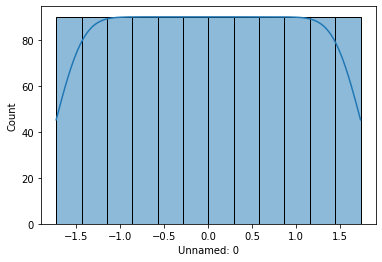

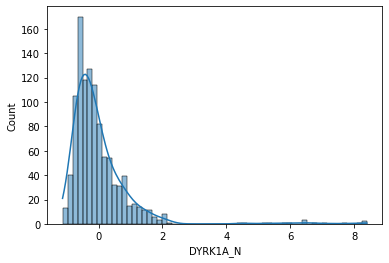

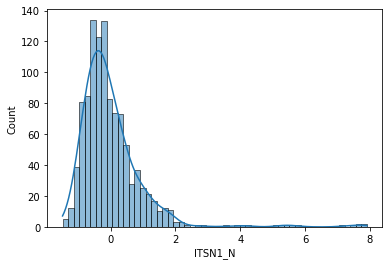

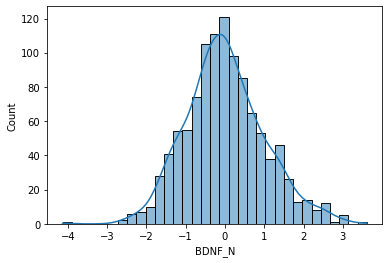

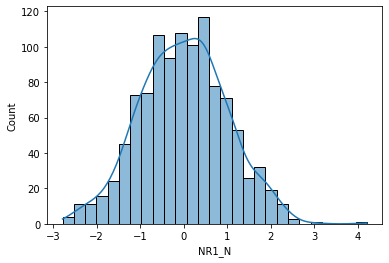

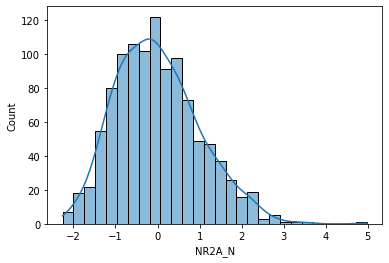

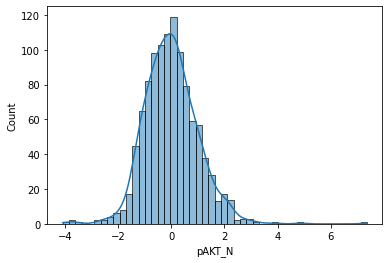

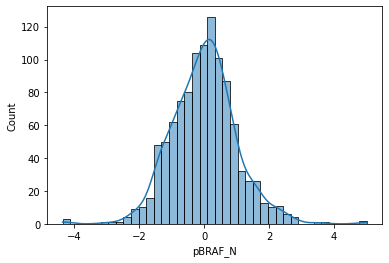

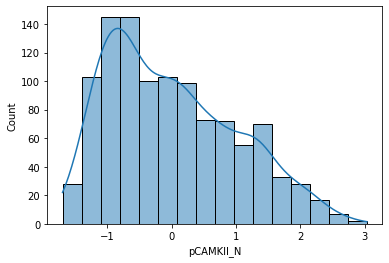

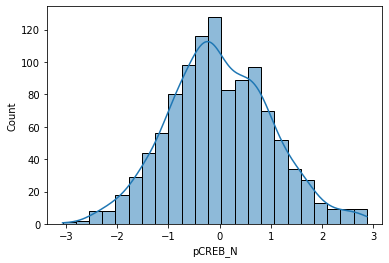

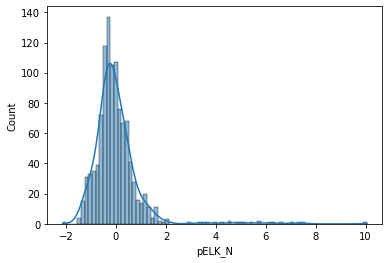

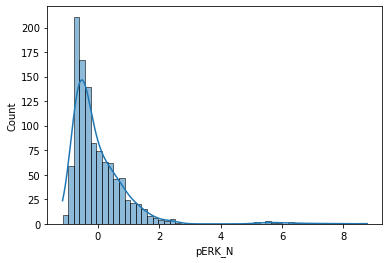

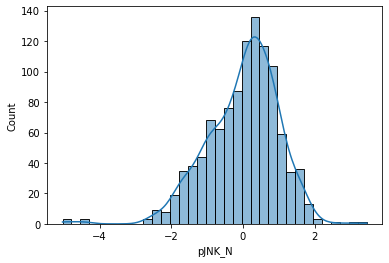

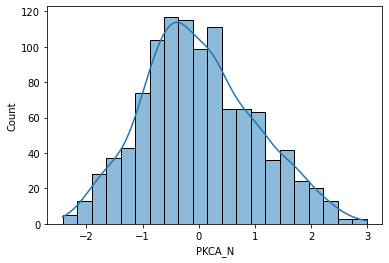

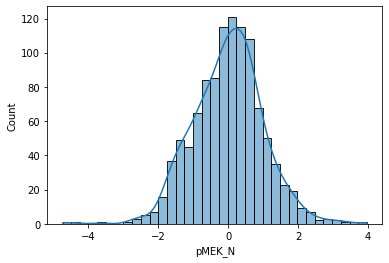

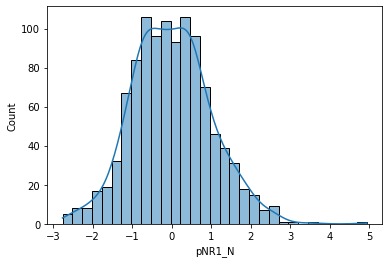

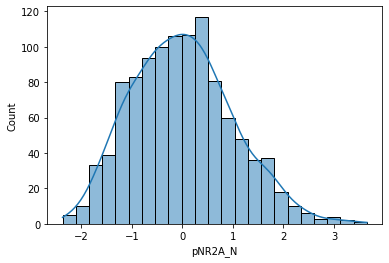

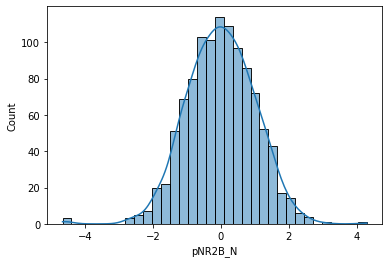

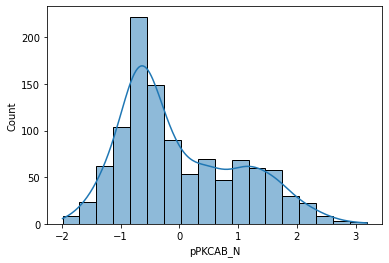

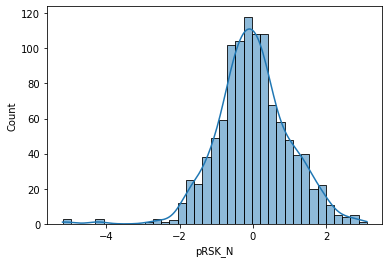

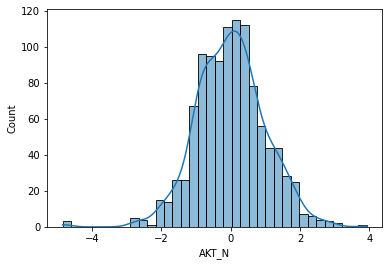

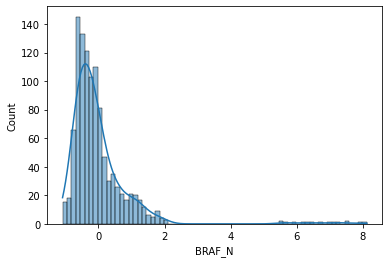

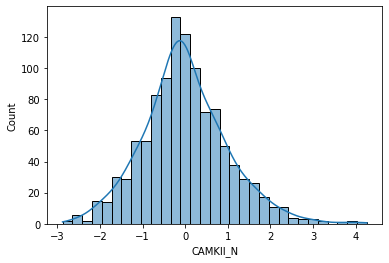

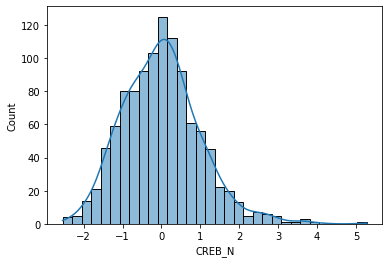

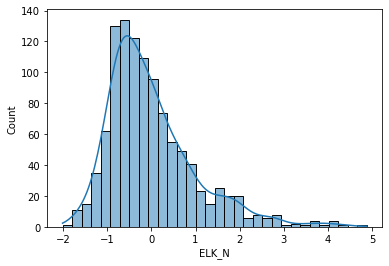

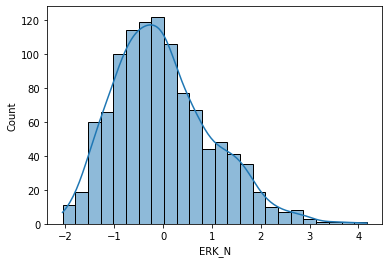

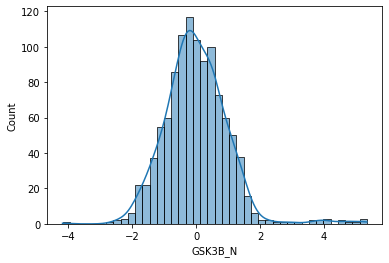

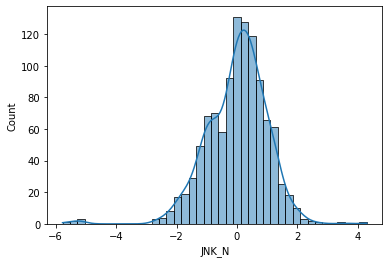

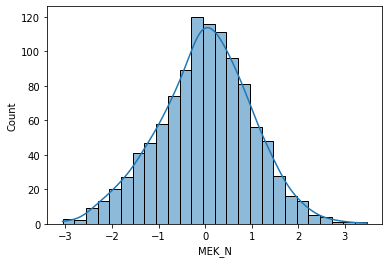

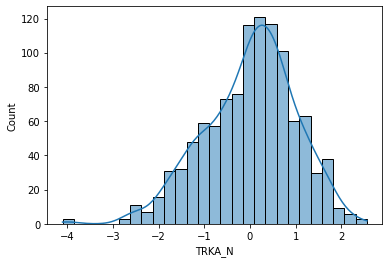

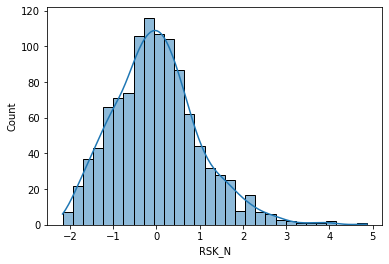

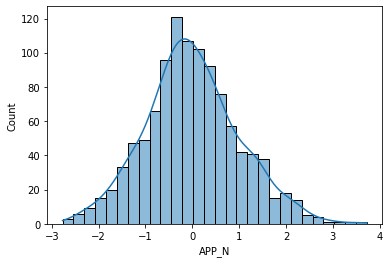

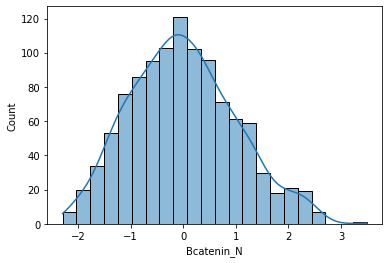

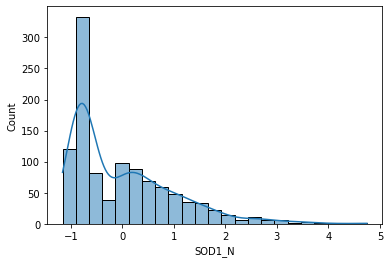

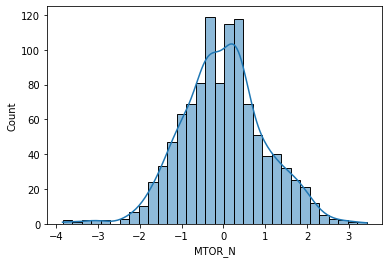

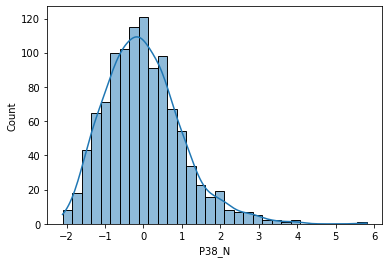

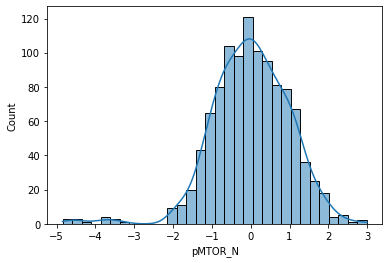

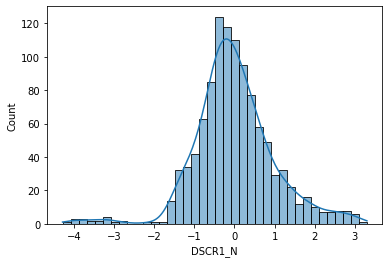

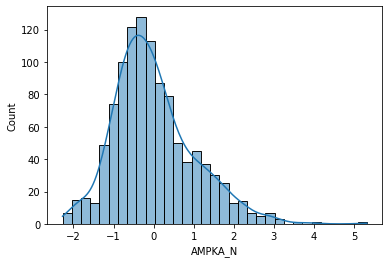

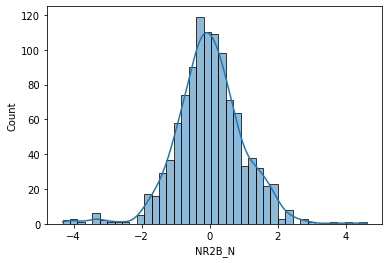

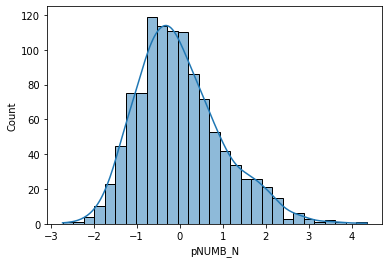

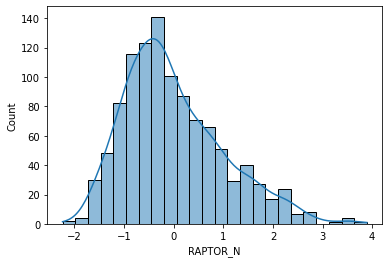

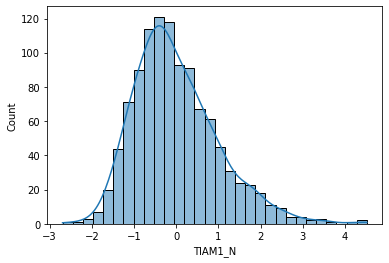

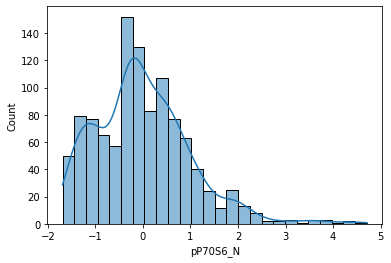

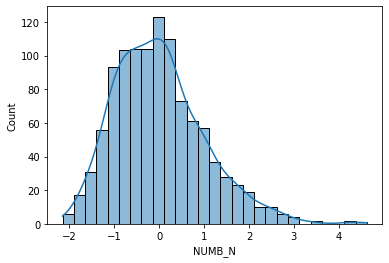

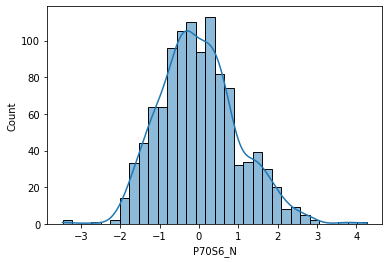

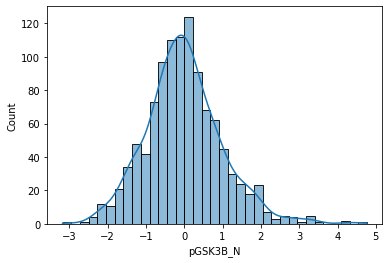

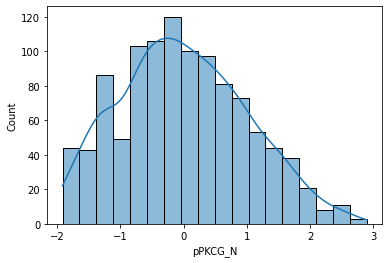

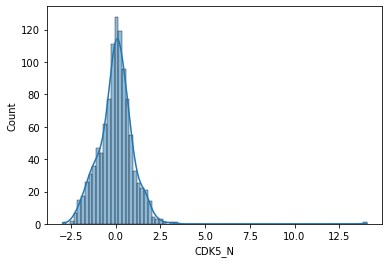

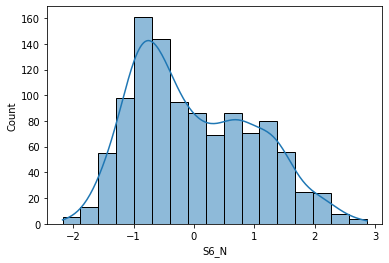

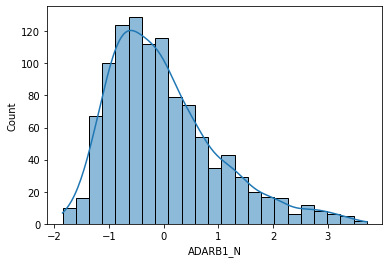

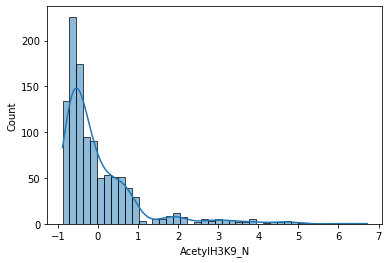

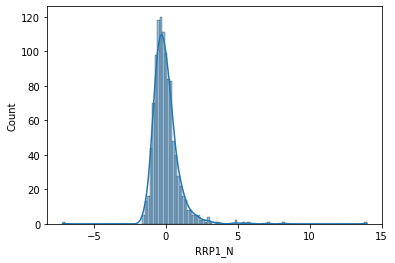

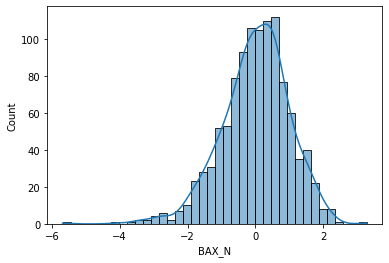

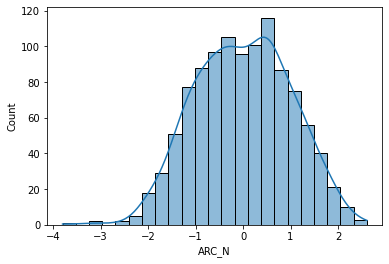

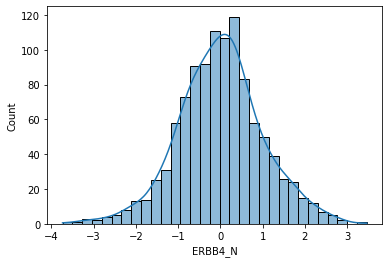

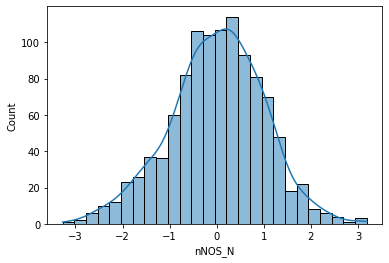

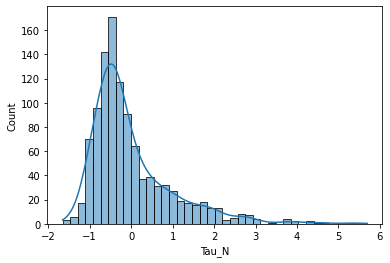

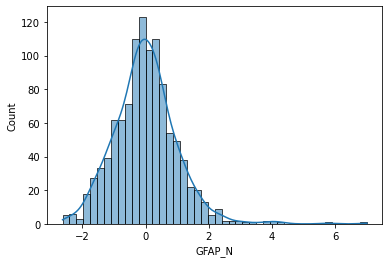

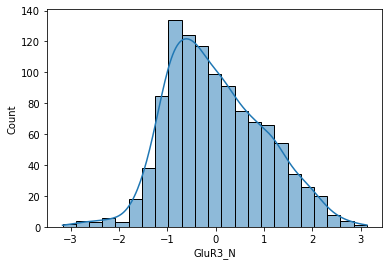

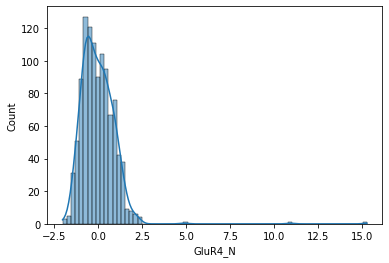

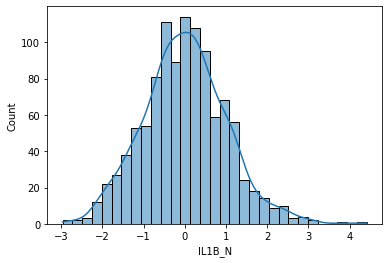

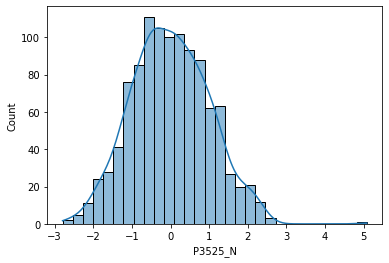

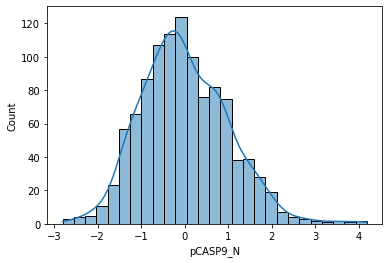

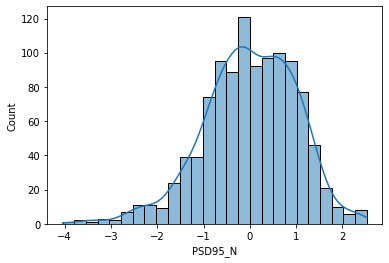

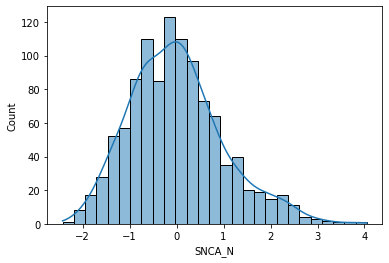

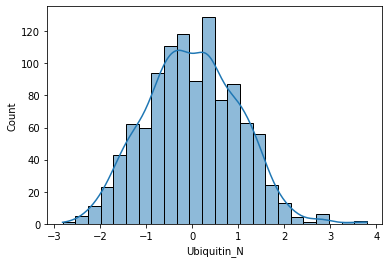

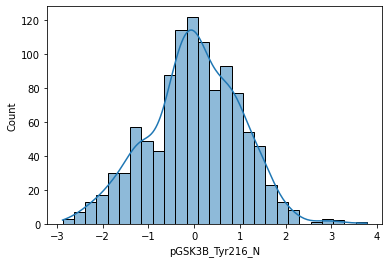

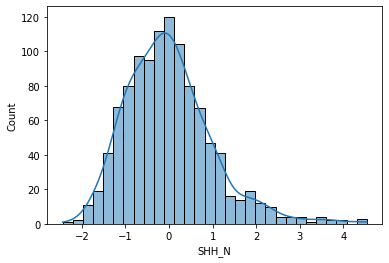

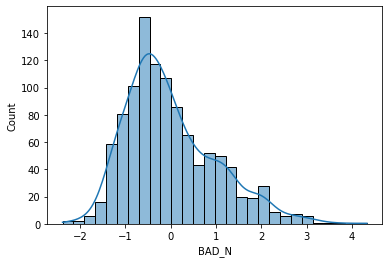

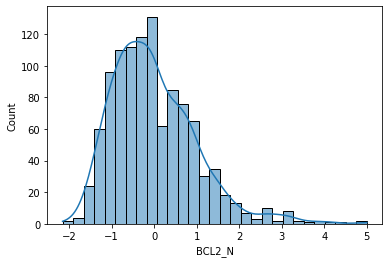

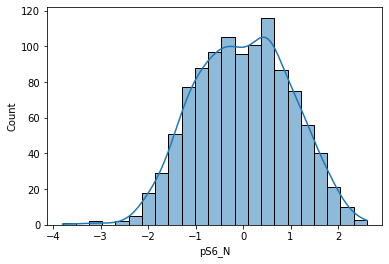

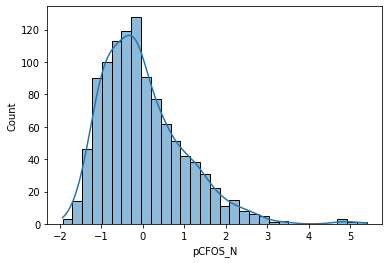

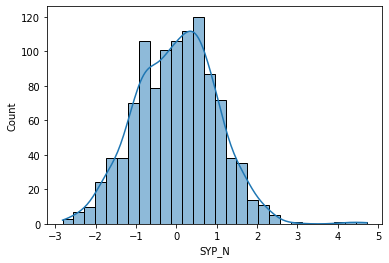

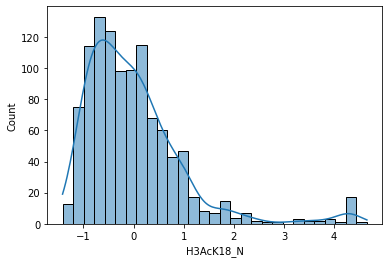

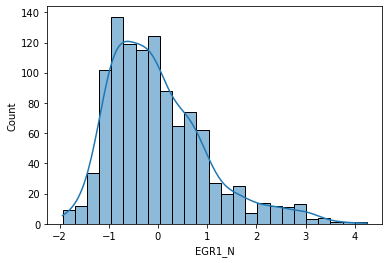

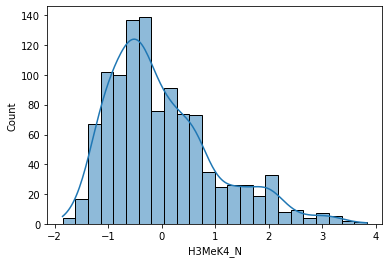

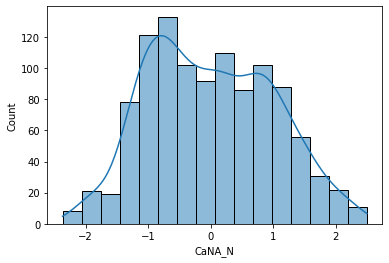

In [39]:
for feature in new_data.columns[:-4]:
    sns.histplot(data=scaled_data1[feature], kde=True)
    plt.show()


In [40]:
scaler_norm=MinMaxScaler()
scaled_data2=scaler_norm.fit_transform(new_data.iloc[:, :-4])


In [41]:
scaled_data2=pd.DataFrame(scaled_data2, columns=new_data.columns[:-4])
scaled_data2=pd.concat([scaled_data2, new_data.iloc[:, -4:-1]], axis=1)


In [42]:
scaled_data2

Unnamed: 0  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0       0.000000  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006   
1       0.000927  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887   
2       0.001854  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369   
3       0.002780  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530   
4       0.003707  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976   
...          ...       ...       ...       ...       ...       ...       ...   
1075    0.996293  0.046197  0.092577  0.365672  0.313684  0.127872  0.312096   
1076    0.997220  0.053509  0.097062  0.357235  0.342243  0.157739  0.395191   
1077    0.998146  0.035163  0.063556  0.311370  0.165795  0.071655  0.330863   
1078    0.999073  0.032018  0.071071  0.337173  0.224787  0.095856  0.306129   
1079    1.000000  0.066342  0.091503  0.370133  0.313976  0.127028  0.394619   

       pBRAF_N  pCAMKII_N   pCREB_N  ...     pS6_N   pCFOS_N     SYP_N  \
0     0.448666   0.168257  0.617322  ...  0.426816  0.133930  0.336299   
1     0.429899   0.154925  0.590173  ...  0.429952  0.110434  0.365208   
2     0.441381   0.153485  0.607102  ...  0.448652  0.121560  0.353621   
3     0.444307   0.132074  0.486945  ...  0.392700  0.151031  0.265619   
4     0.433100   0.129086  0.410194  ...  0.410187  0.147711  0.350381   
...        ...        ...       ...  ...       ...       ...       ...   
1075  0.423753   0.186230  0.488562  ...  0.530654  0.572176  0.230480   
1076  0.468154   0.190968  0.535204  ...  0.506703  0.527466  0.232818   
1077  0.384915   0.105509  0.374040  ...  0.565002  0.425904  0.326363   
1078  0.433086   0.121245  0.409605  ...  0.634370  0.647984  0.277565   
1079  0.504969   0.166308  0.572903  ...  0.564459  0.596908  0.322821   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  
0      0.087715  0.102890  0.084580  0.705738       0.0        1.0       0.0  
1      0.080692  0.115874  0.093977  0.749771       0.0        1.0       0.0  
2      0.080465  0.109050  0.082162  0.868229       0.0        1.0       0.0  
3      0.126763  0.164241  0.144543  0.721879       0.0        1.0       0.0  
4      0.096959  0.136298  0.149281  0.812053       0.0        1.0       0.0  
...         ...       ...       ...       ...       ...        ...       ...  
1075   0.597619  0.388482  0.725820  0.504334       1.0        0.0       1.0  
1076   0.614760  0.371843  0.614028  0.504110       1.0        0.0       1.0  
1077   0.603927  0.484631  0.811962  0.547100       1.0        0.0       1.0  
1078   0.640497  0.571336  0.844450  0.529739       1.0        0.0       1.0  
1079   0.638311  0.577914  0.844210  0.508336       1.0        0.0       1.0  

[1080 rows x 81 columns]

In [43]:
scaled_data2.isnull().sum()

Unnamed: 0    0
DYRK1A_N      0
ITSN1_N       0
BDNF_N        0
NR1_N         0
             ..
H3MeK4_N      0
CaNA_N        0
Genotype      0
Treatment     0
Behavior      0
Length: 81, dtype: int64

In [82]:
scaled_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1080 non-null   float64
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR2B_N       

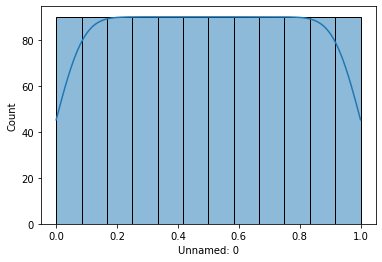

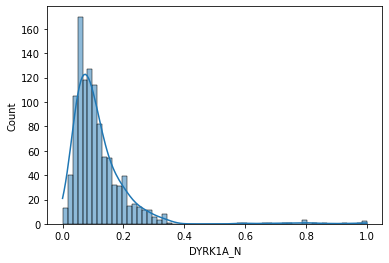

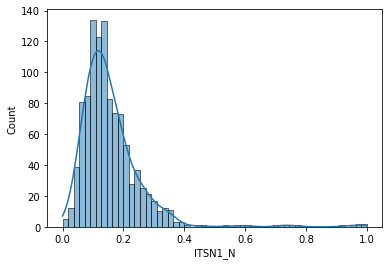

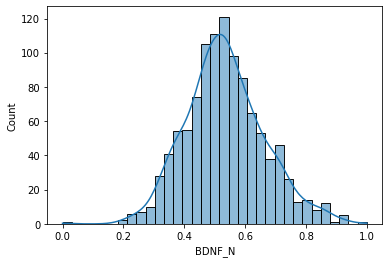

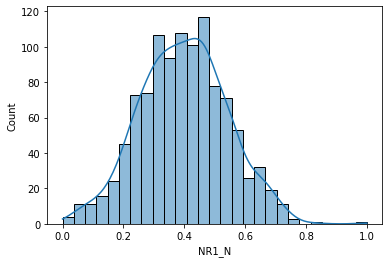

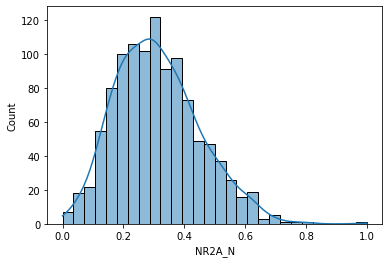

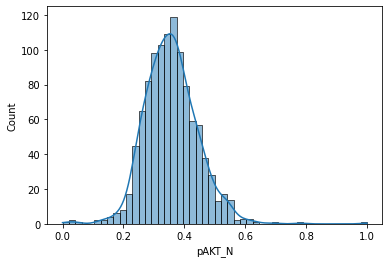

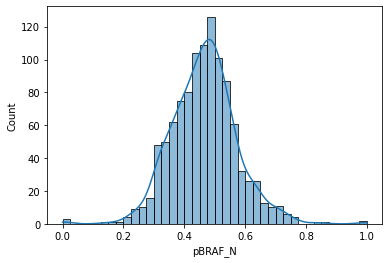

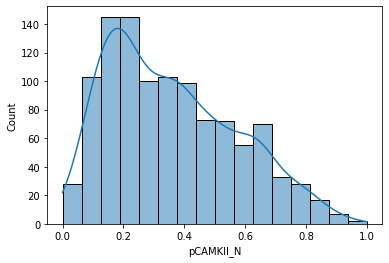

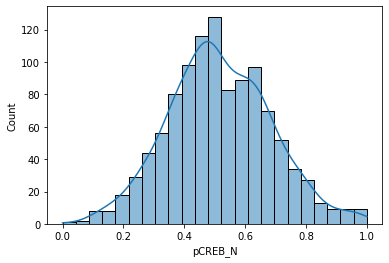

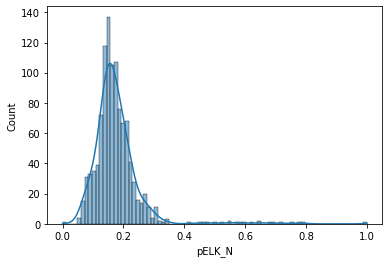

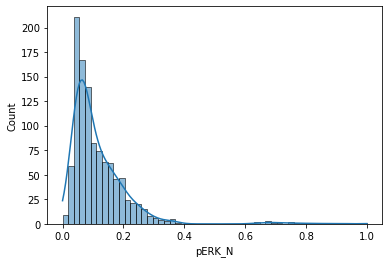

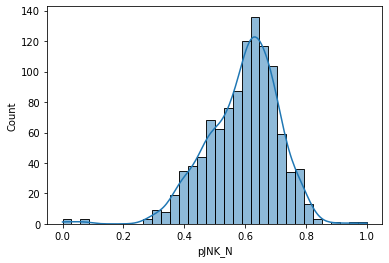

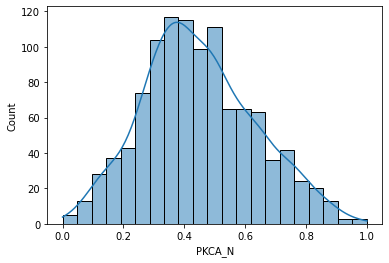

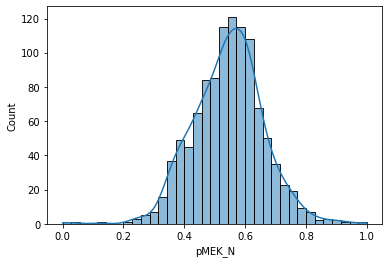

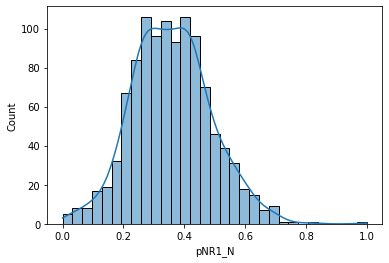

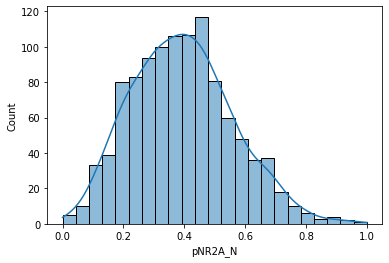

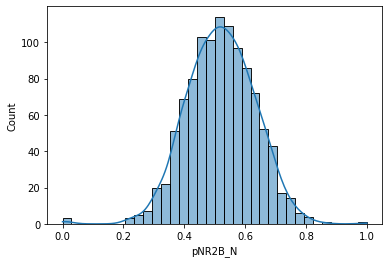

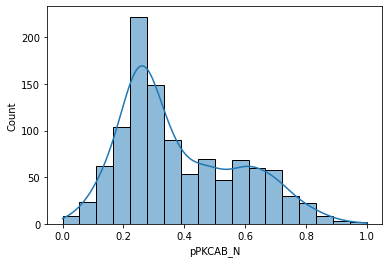

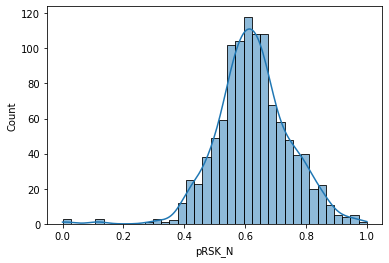

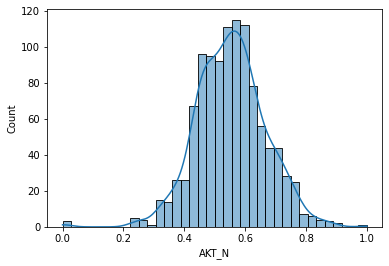

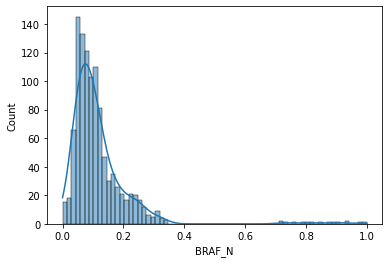

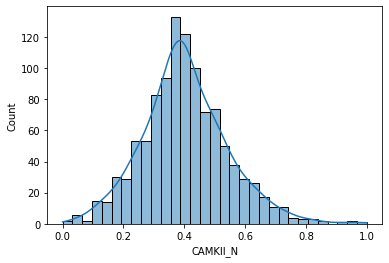

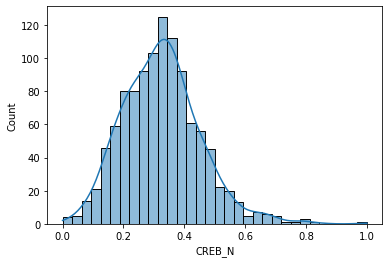

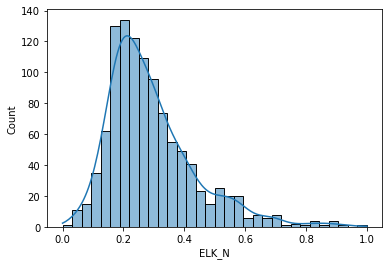

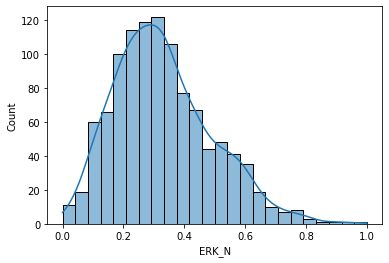

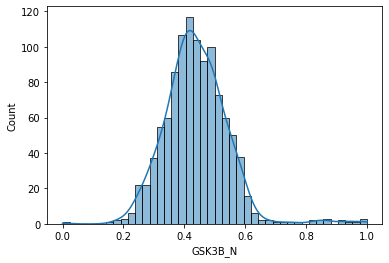

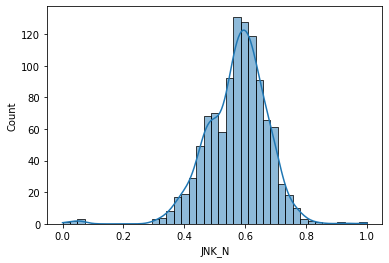

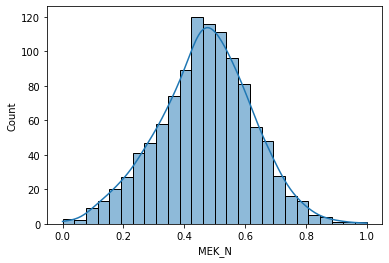

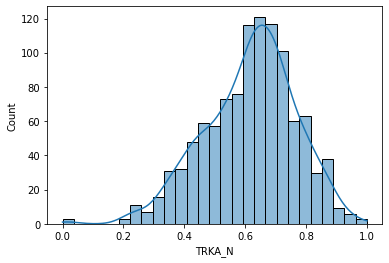

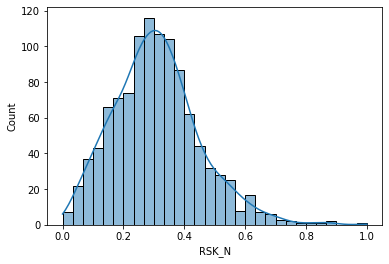

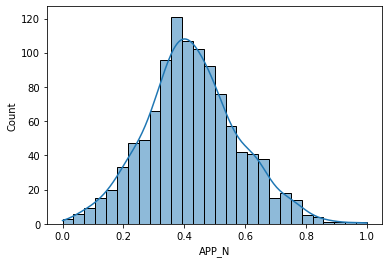

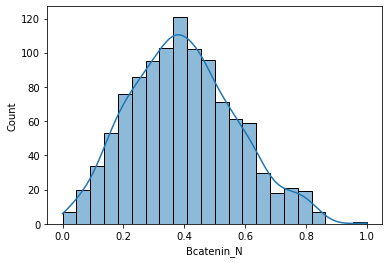

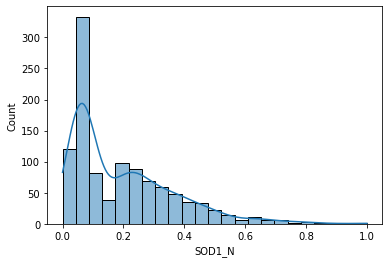

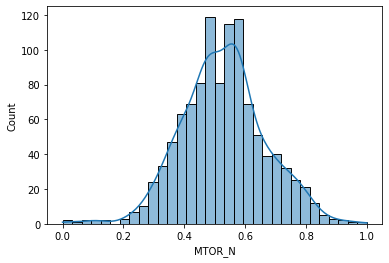

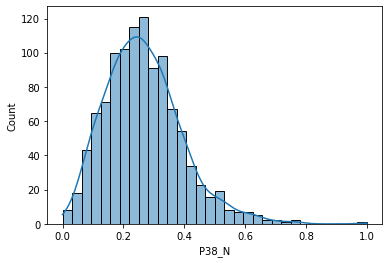

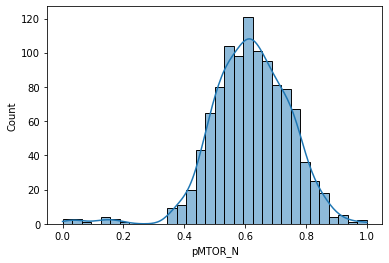

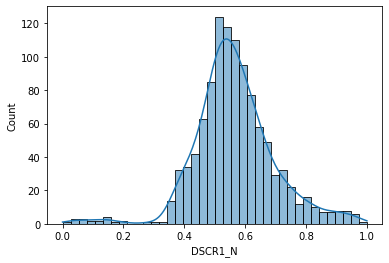

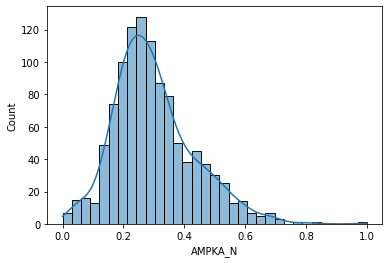

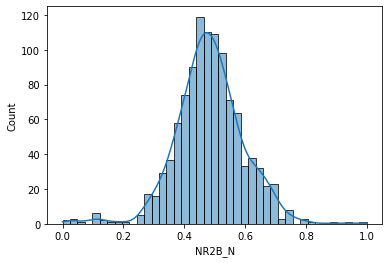

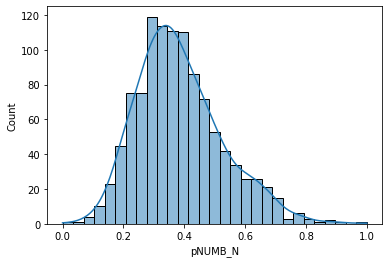

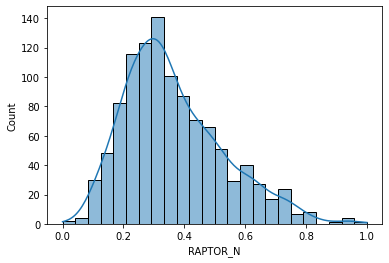

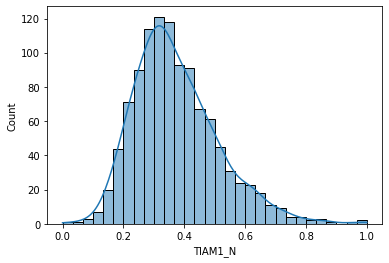

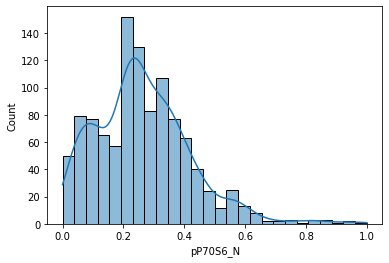

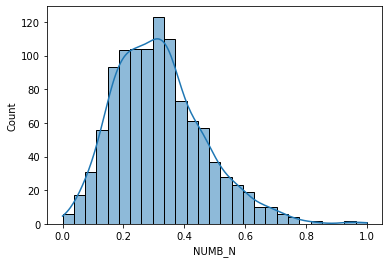

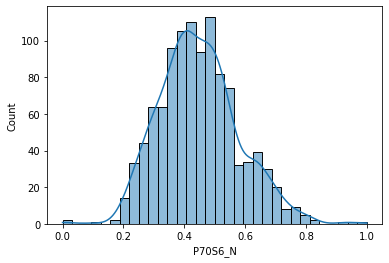

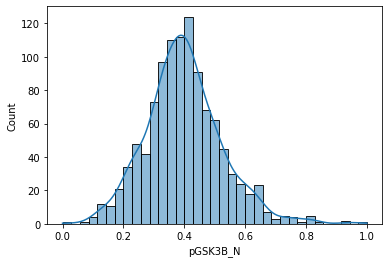

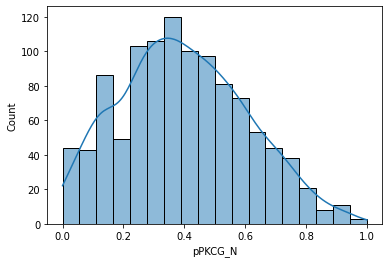

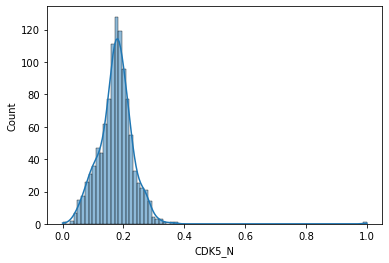

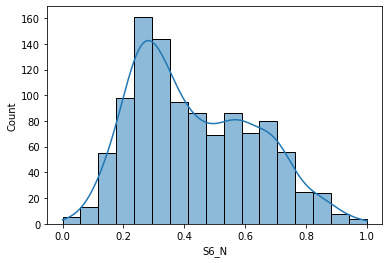

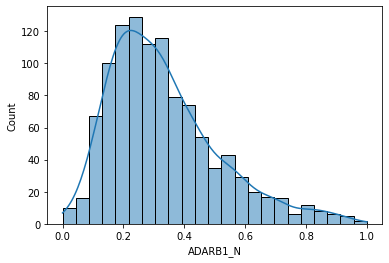

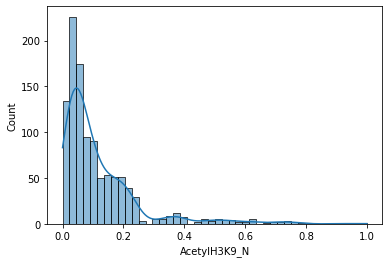

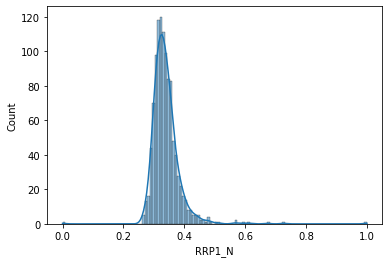

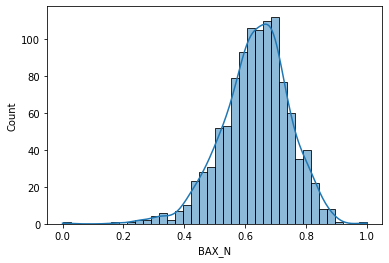

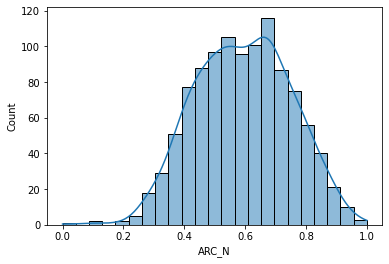

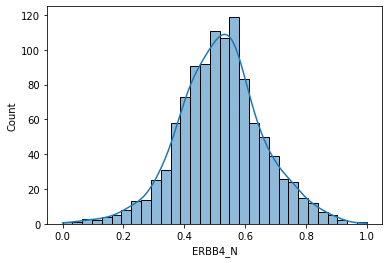

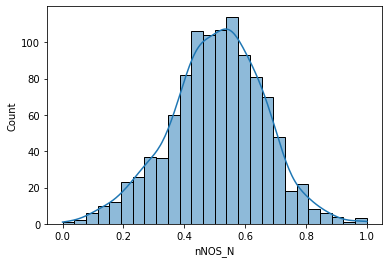

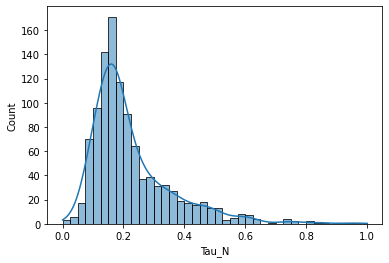

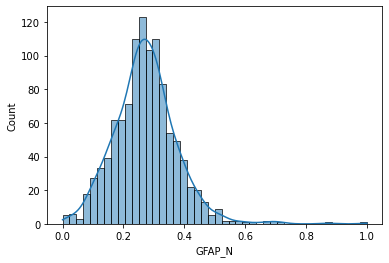

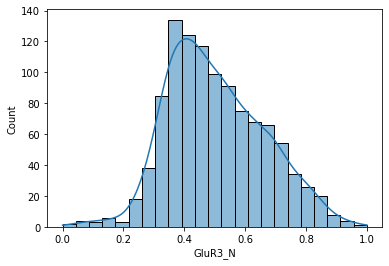

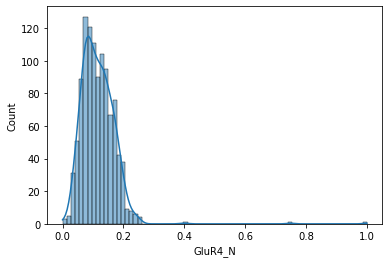

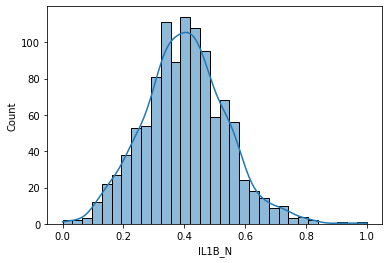

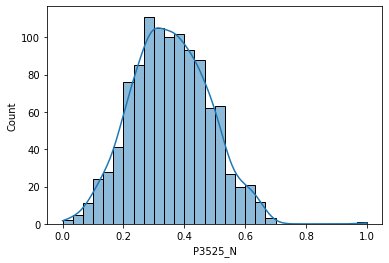

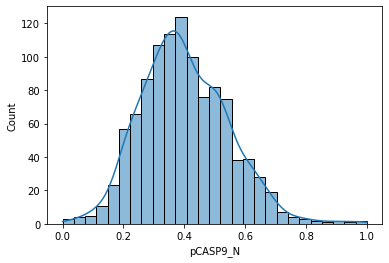

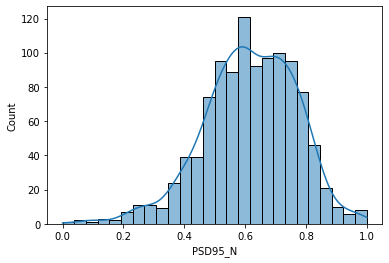

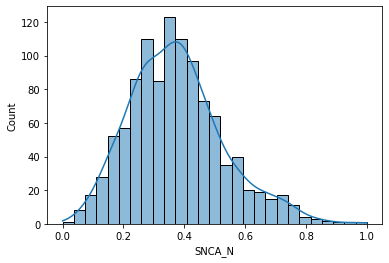

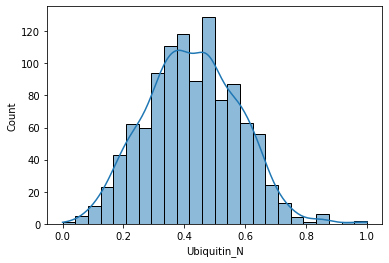

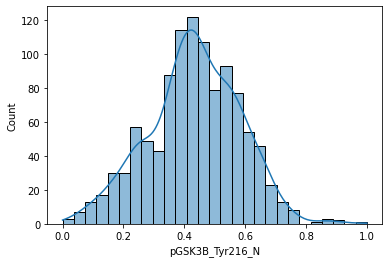

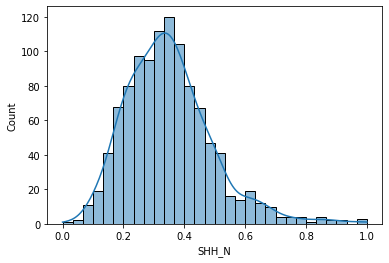

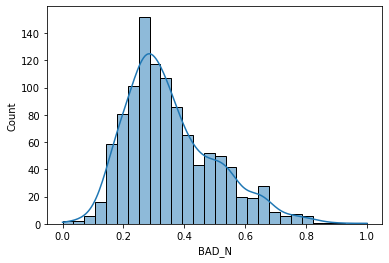

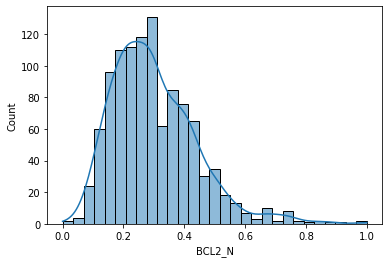

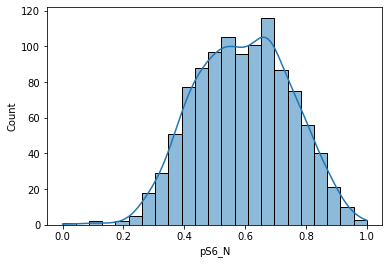

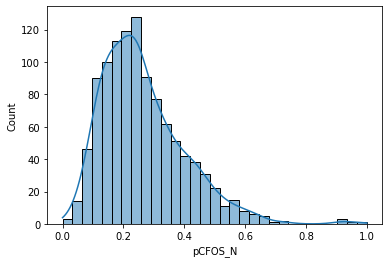

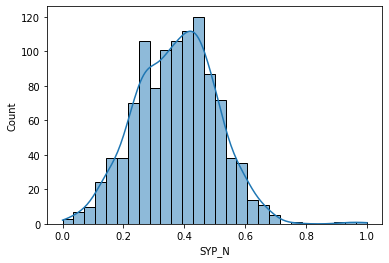

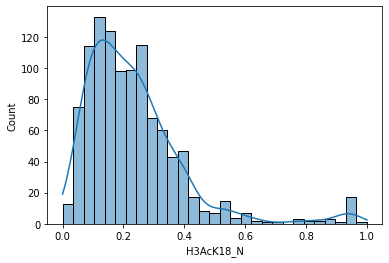

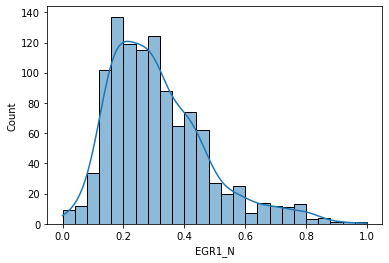

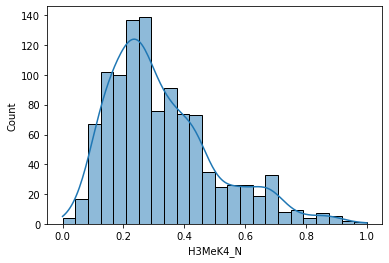

In [83]:
for feature in scaled_data2.columns[:-4]:
    sns.histplot(data=scaled_data2[feature], kde=True)
    plt.show()


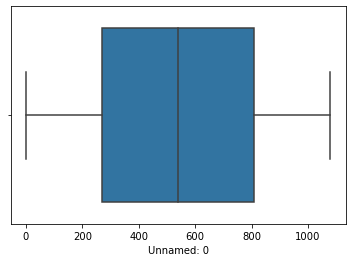

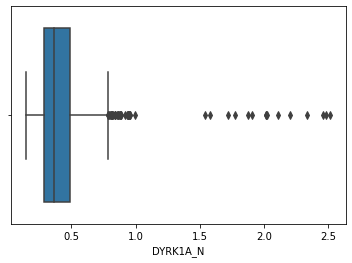

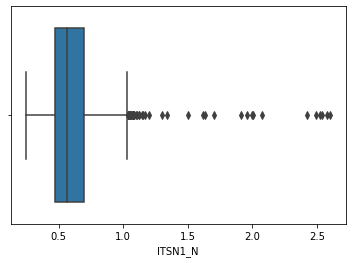

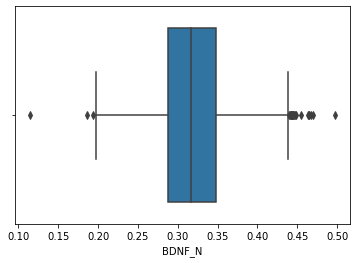

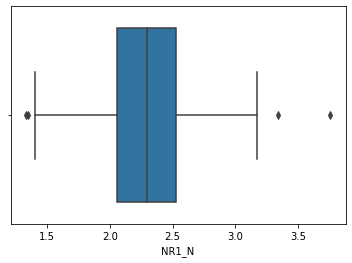

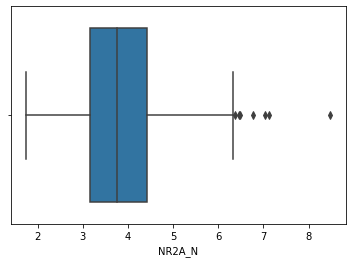

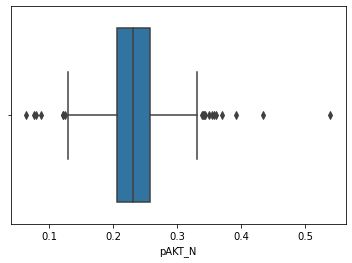

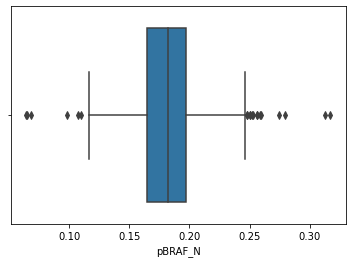

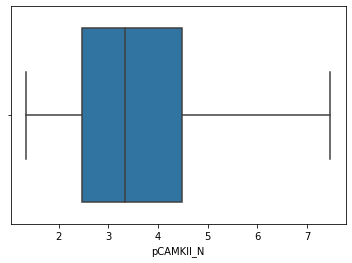

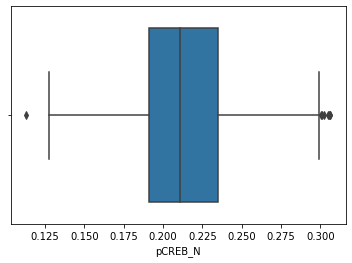

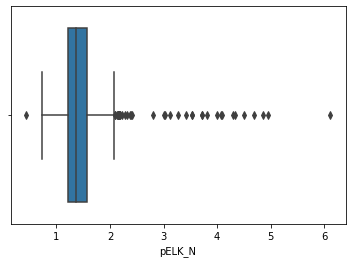

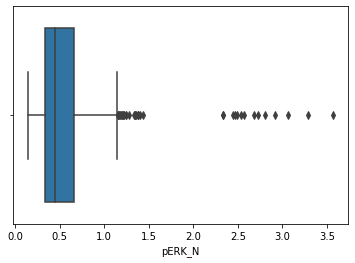

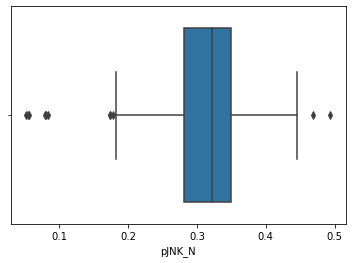

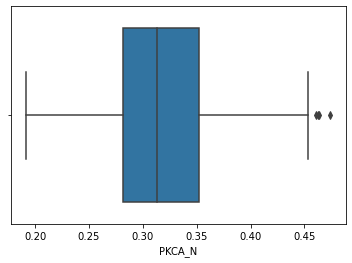

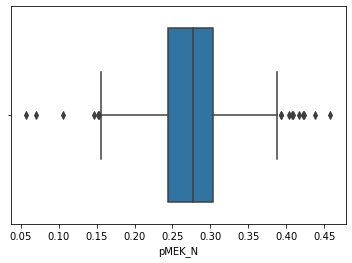

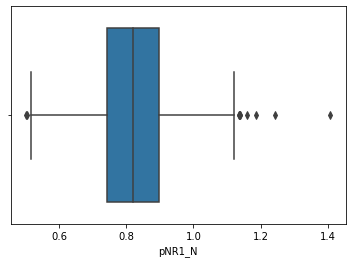

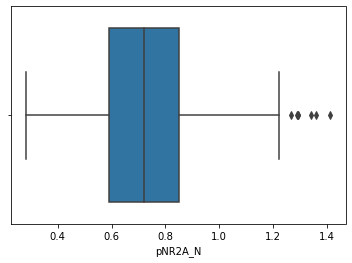

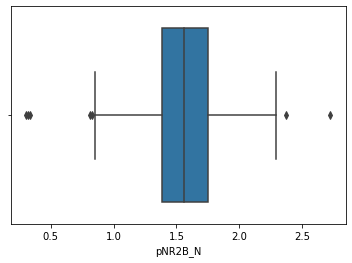

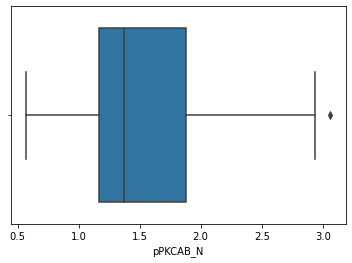

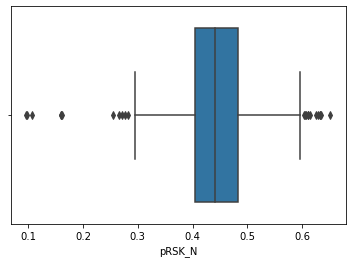

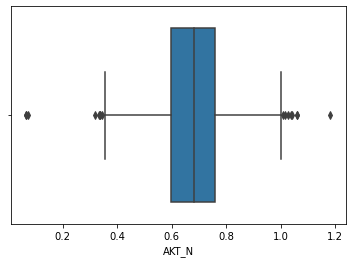

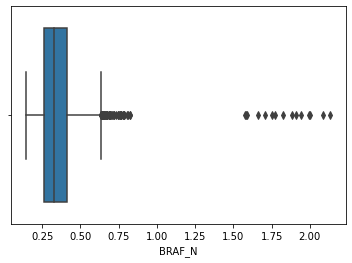

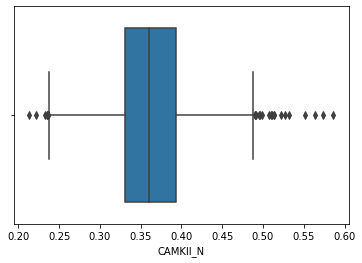

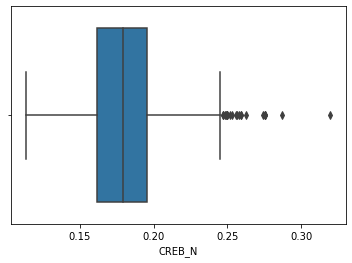

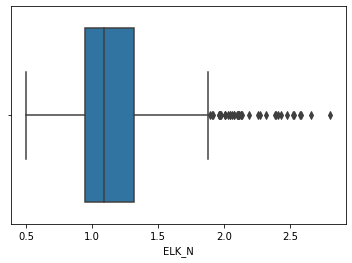

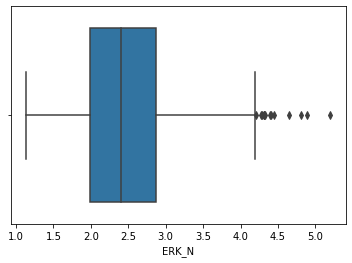

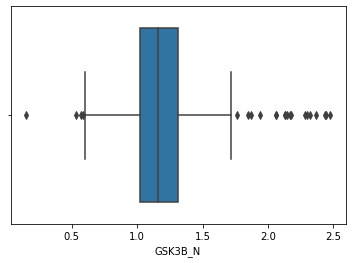

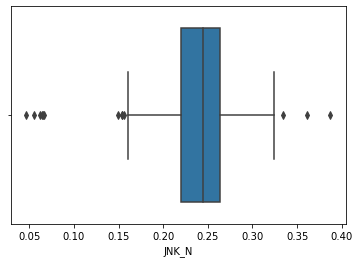

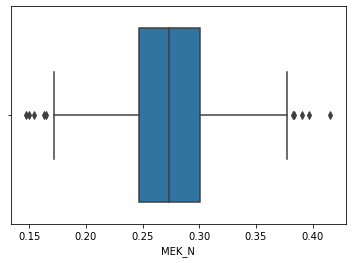

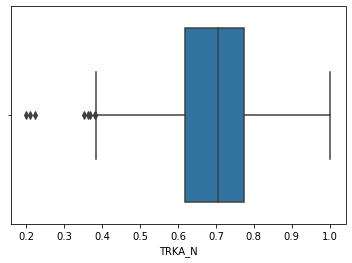

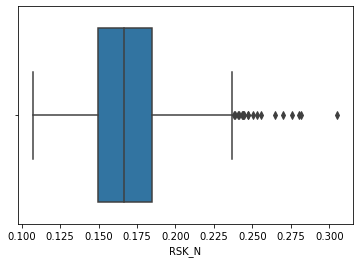

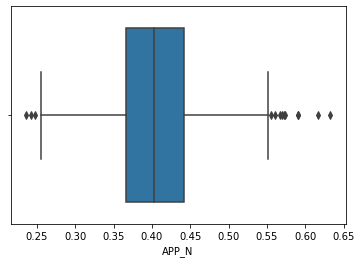

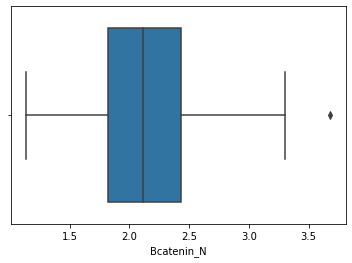

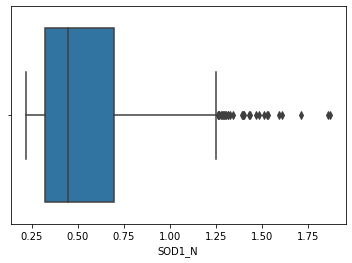

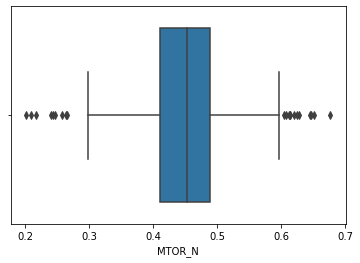

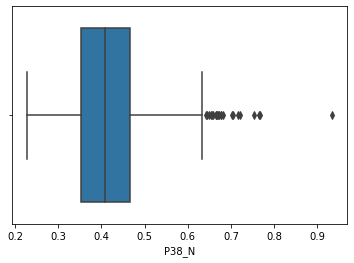

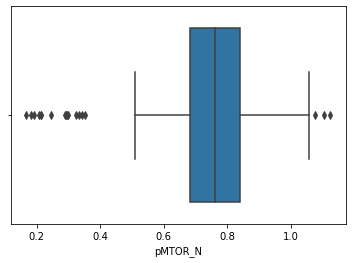

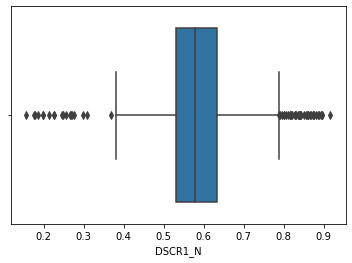

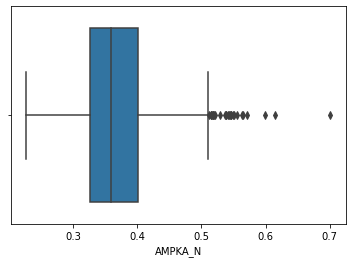

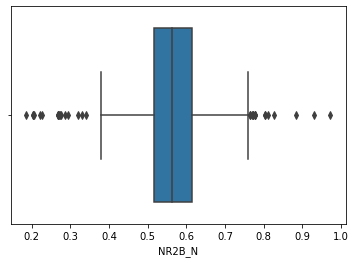

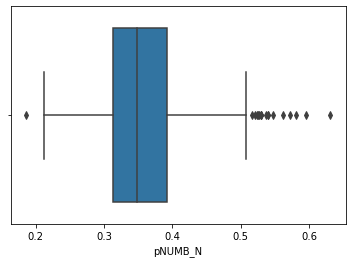

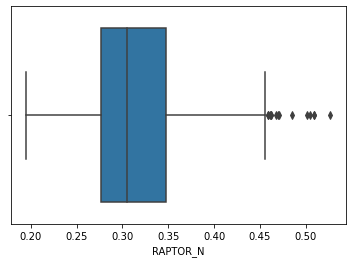

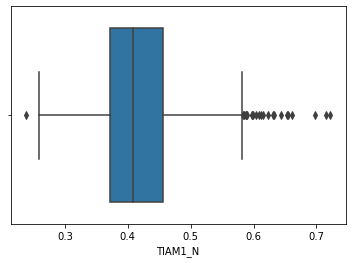

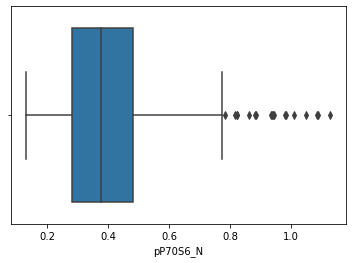

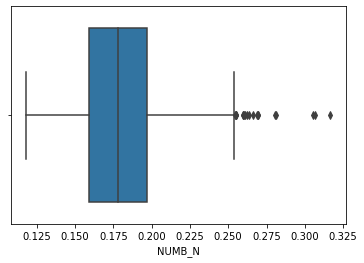

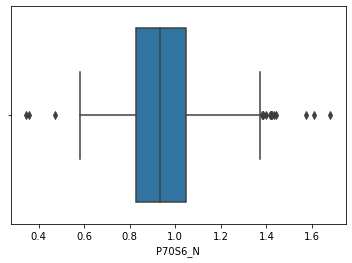

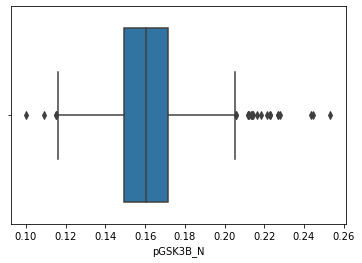

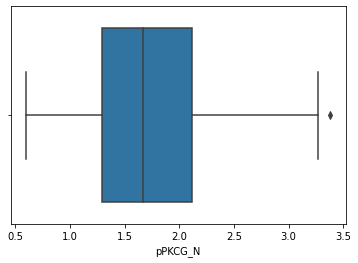

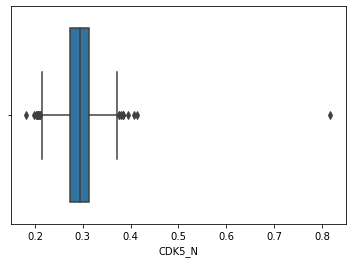

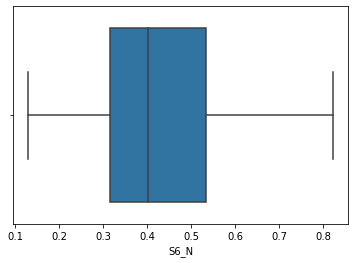

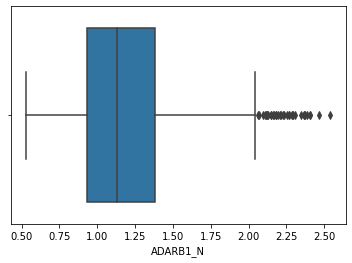

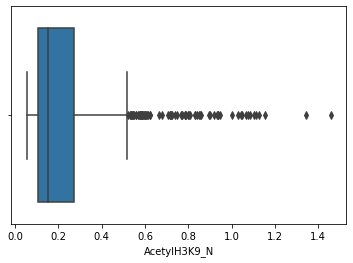

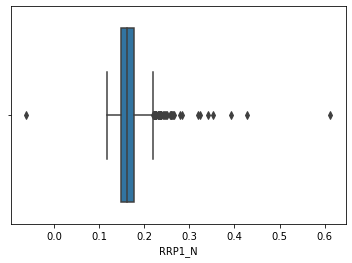

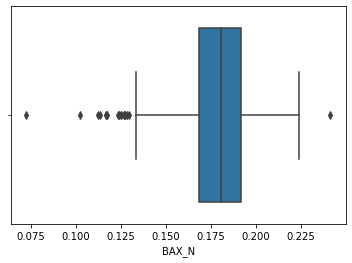

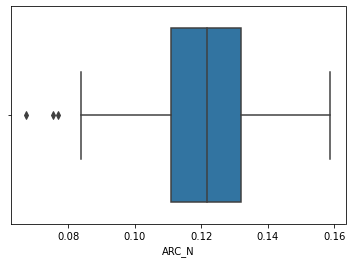

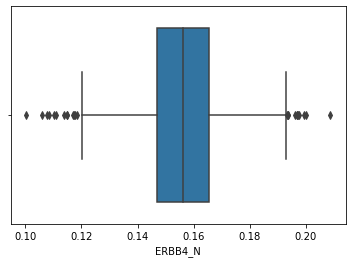

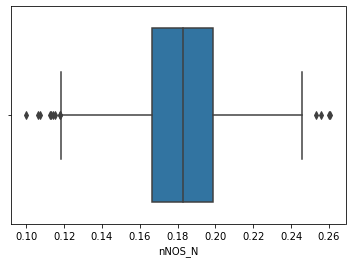

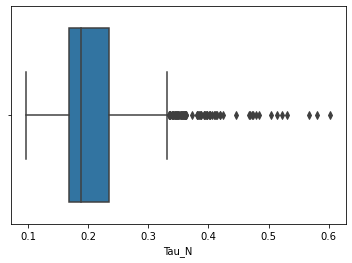

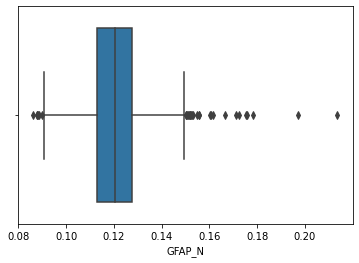

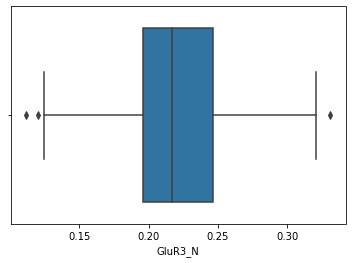

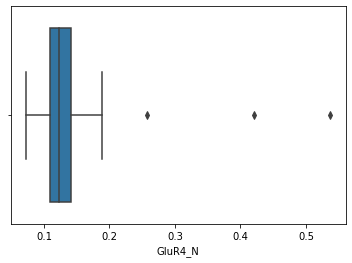

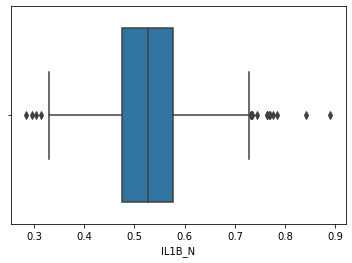

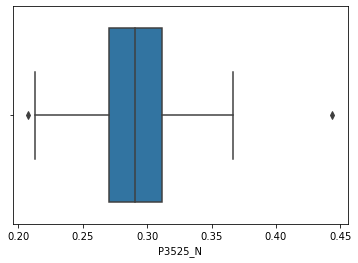

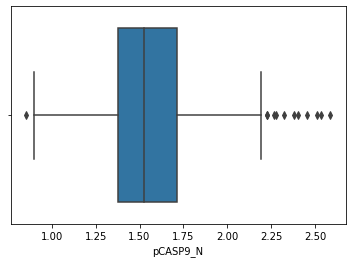

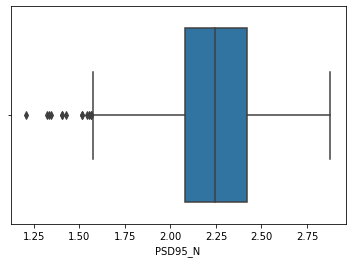

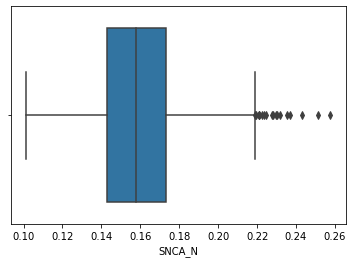

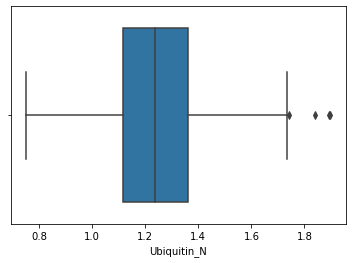

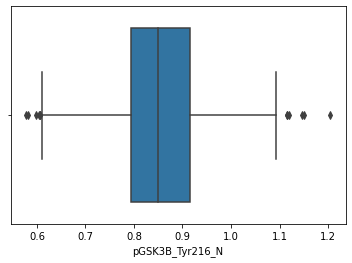

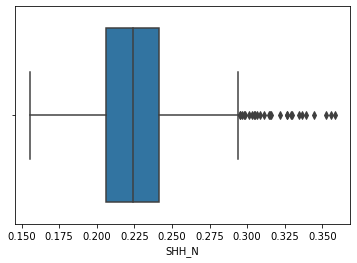

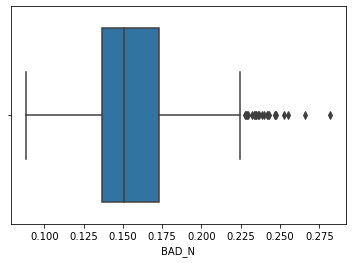

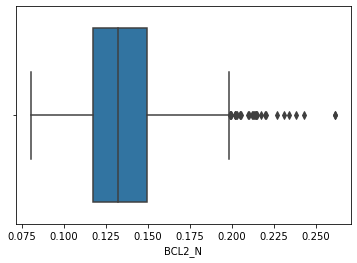

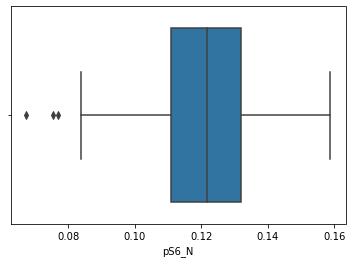

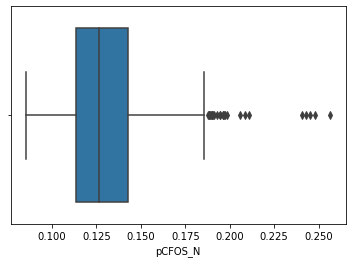

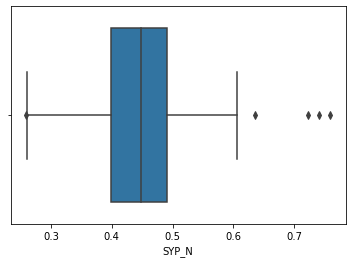

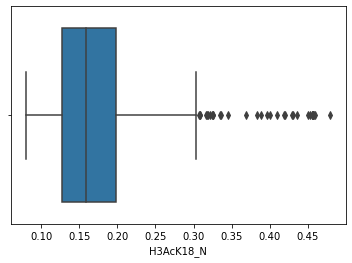

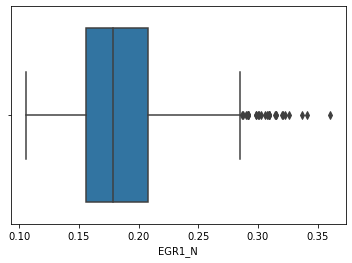

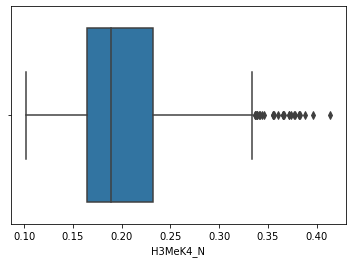

In [84]:
for feature in scaled_data2.columns[:-4]:
    sns.boxplot(x=new_data[feature])
    plt.show()


<AxesSubplot:>

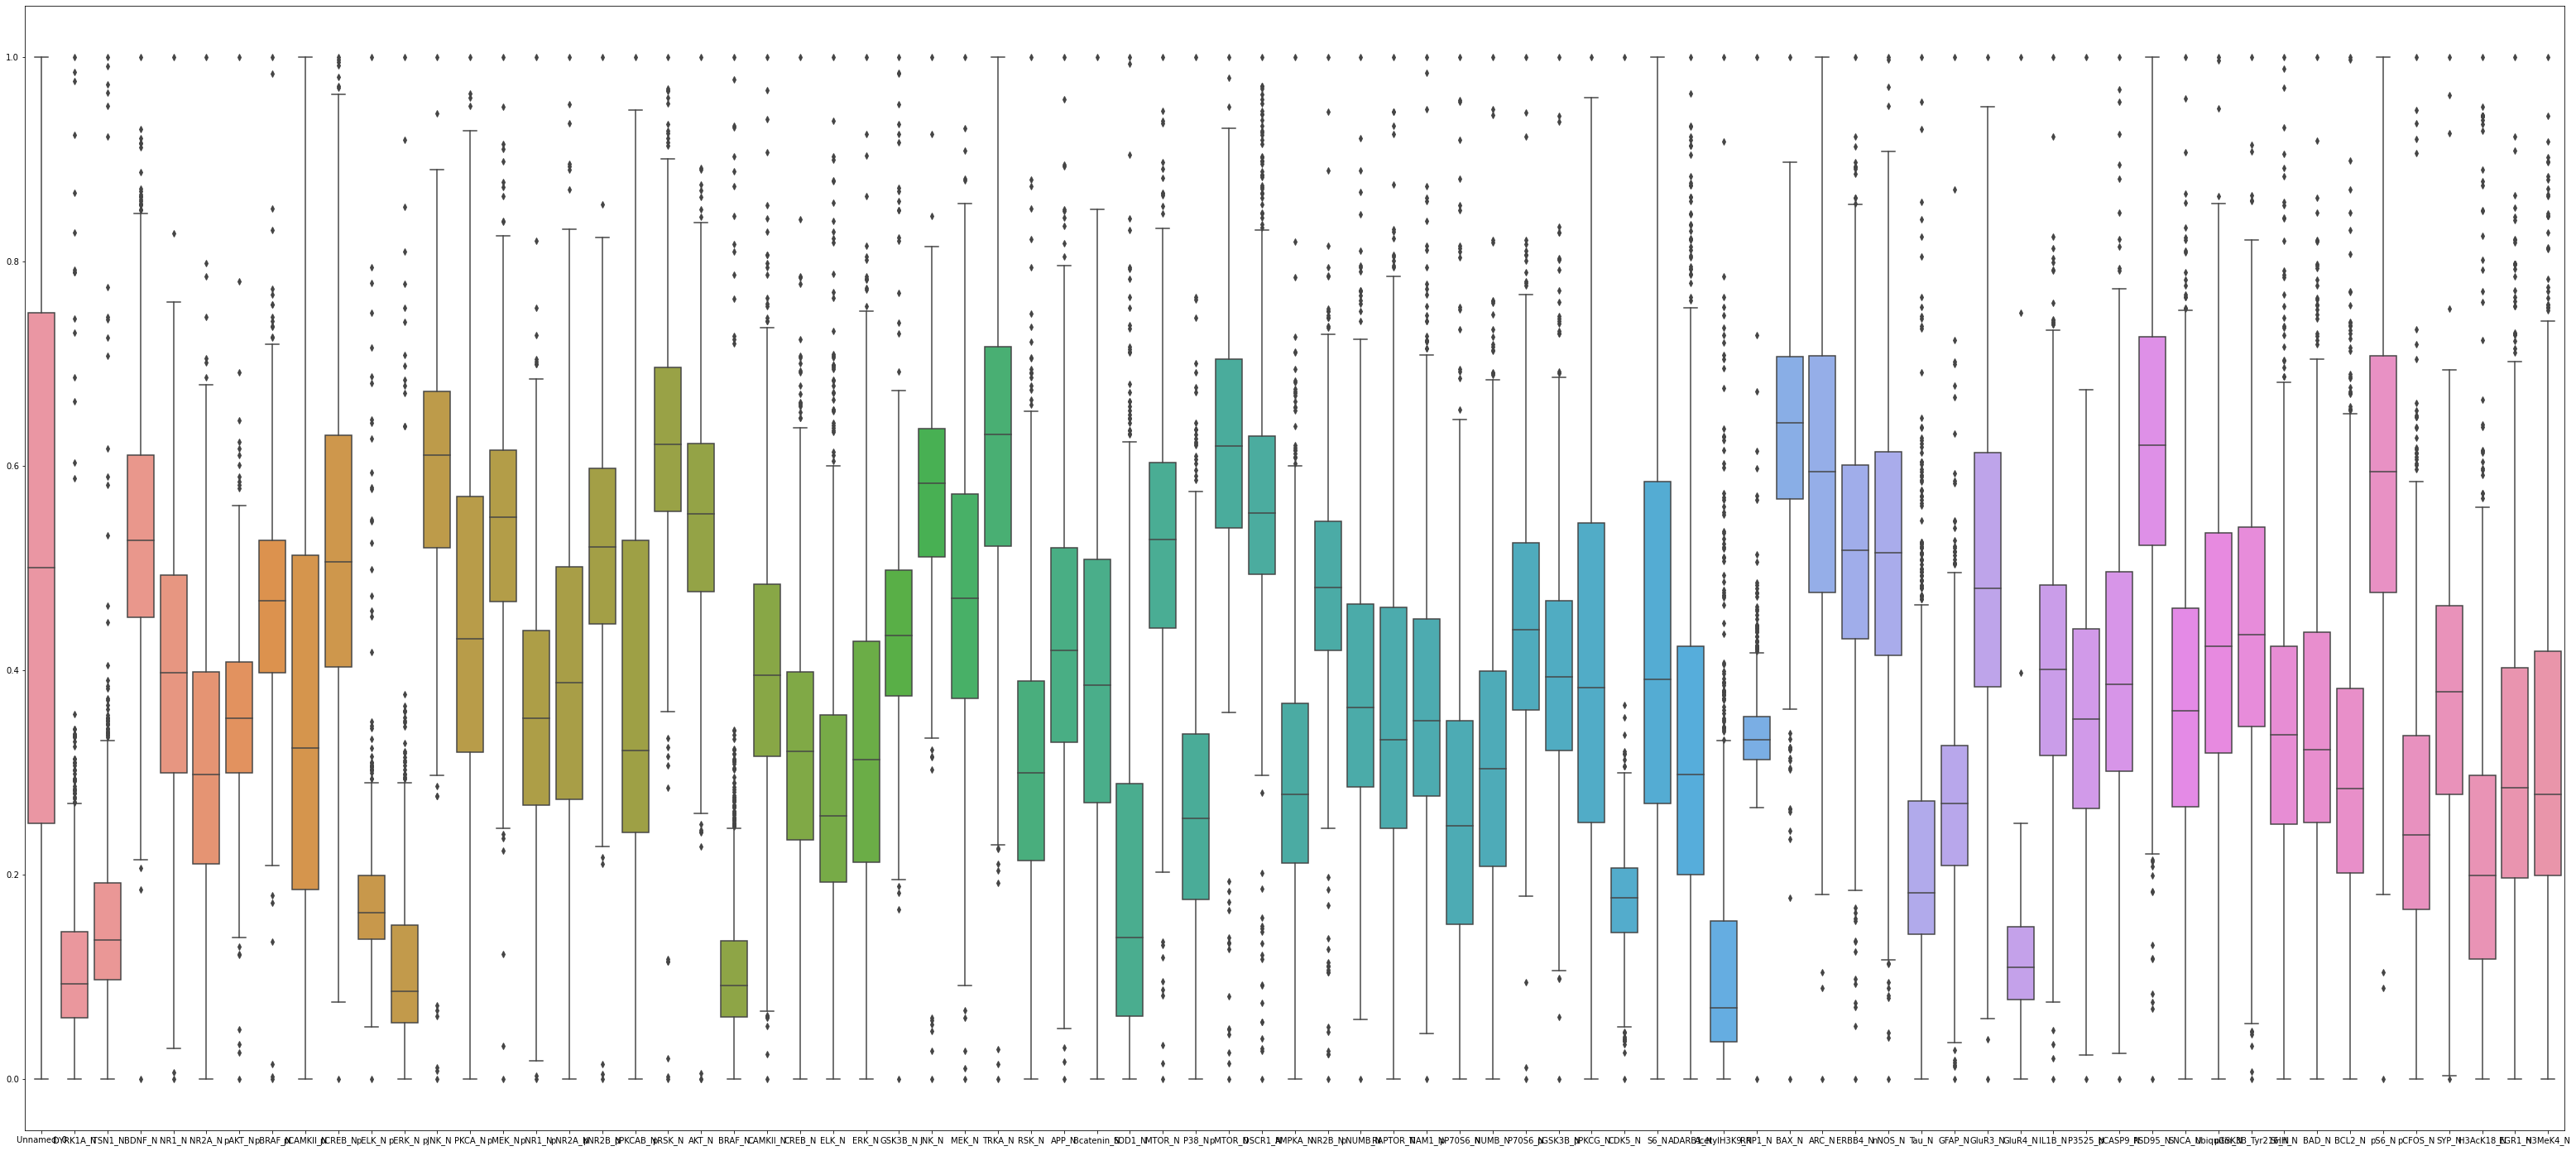

In [85]:
plt.figure(figsize=(55,25))
sns.boxplot(data=scaled_data2.iloc[:,:-4])


In [87]:
scaled_data2.corr()

Unnamed: 0  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N  \
Unnamed: 0    1.000000 -0.024135  0.062559 -0.041160 -0.067633 -0.171089   
DYRK1A_N     -0.024135  1.000000  0.959457  0.359278  0.294574  0.325129   
ITSN1_N       0.062559  0.959457  1.000000  0.459923  0.422500  0.426023   
BDNF_N       -0.041160  0.359278  0.459923  1.000000  0.805655  0.749445   
NR1_N        -0.067633  0.294574  0.422500  0.805655  1.000000  0.873865   
...                ...       ...       ...       ...       ...       ...   
H3MeK4_N      0.212970 -0.328219 -0.337023 -0.146584 -0.188408 -0.262945   
CaNA_N       -0.063856  0.475789  0.517741  0.262791  0.205243  0.186698   
Genotype      0.864688  0.089042  0.173469 -0.043037 -0.111457 -0.161111   
Treatment    -0.431006 -0.010998 -0.031878 -0.068227 -0.066746  0.007692   
Behavior      0.254694 -0.505611 -0.483169 -0.144533 -0.019275 -0.113615   

              pAKT_N   pBRAF_N  pCAMKII_N   pCREB_N  ...     pS6_N   pCFOS_N  \
Unnamed: 0  0.106220  0.003499   0.071399  0.243425  ... -0.057218 -0.041965   
DYRK1A_N   -0.181048 -0.093880  -0.180058  0.046974  ... -0.326436 -0.217530   
ITSN1_N    -0.147570 -0.076473  -0.132549  0.171208  ... -0.256485 -0.295368   
BDNF_N      0.317820  0.390415   0.247387  0.603989  ...  0.127765 -0.240126   
NR1_N       0.211250  0.243727   0.301468  0.596400  ...  0.264399 -0.355281   
...              ...       ...        ...       ...  ...       ...       ...   
H3MeK4_N    0.300113  0.303428   0.092921  0.106465  ...  0.240841  0.299994   
CaNA_N     -0.237799 -0.213181  -0.375211  0.040615  ... -0.344369 -0.301903   
Genotype    0.092895  0.014174   0.026751  0.174500  ... -0.136617 -0.085185   
Treatment   0.129702  0.186447   0.186630 -0.083863  ...  0.137349  0.034640   
Behavior    0.352989  0.318245   0.488291  0.240129  ...  0.563882  0.212243   

               SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  \
Unnamed: 0 -0.183963   0.248149 -0.109313  0.212970 -0.063856  0.864688   
DYRK1A_N   -0.047056  -0.317944 -0.316110 -0.328219  0.475789  0.089042   
ITSN1_N     0.042399  -0.294856 -0.375237 -0.337023  0.517741  0.173469   
BDNF_N      0.449999  -0.147278 -0.169057 -0.146584  0.262791 -0.043037   
NR1_N       0.473455  -0.191112 -0.199149 -0.188408  0.205243 -0.111457   
...              ...        ...       ...       ...       ...       ...   
H3MeK4_N    0.011554   0.597159  0.446461  1.000000 -0.396349  0.163912   
CaNA_N      0.246107  -0.279896 -0.468195 -0.396349  1.000000  0.045850   
Genotype   -0.227713   0.262374 -0.172931  0.163912  0.045850  1.000000   
Treatment   0.010898   0.093387  0.101082  0.033877 -0.125451  0.003096   
Behavior    0.072460   0.362876  0.401453  0.410622 -0.748772  0.029378   

            Treatment  Behavior  
Unnamed: 0  -0.431006  0.254694  
DYRK1A_N    -0.010998 -0.505611  
ITSN1_N     -0.031878 -0.483169  
BDNF_N      -0.068227 -0.144533  
NR1_N       -0.066746 -0.019275  
...               ...       ...  
H3MeK4_N     0.033877  0.410622  
CaNA_N      -0.125451 -0.748772  
Genotype     0.003096  0.029378  
Treatment    1.000000 -0.029378  
Behavior    -0.029378  1.000000  

[81 rows x 81 columns]

<AxesSubplot:>

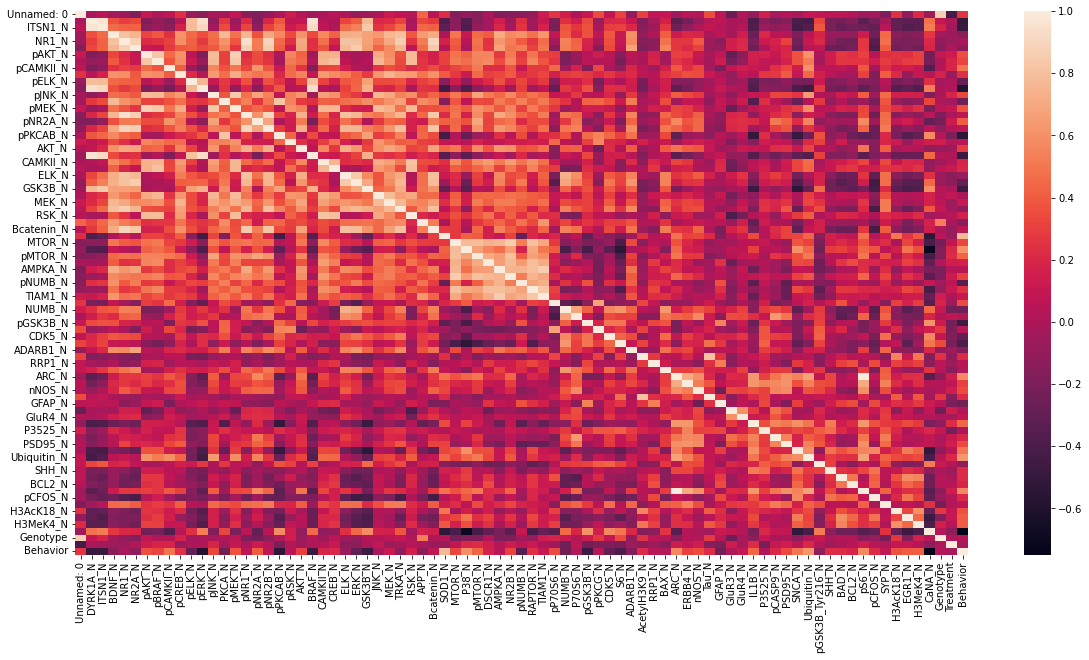

In [88]:
plt.figure(figsize=(20,10))
sns.heatmap(scaled_data2.corr())


In [91]:
scaled_data2

Unnamed: 0  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0       0.000000  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006   
1       0.000927  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887   
2       0.001854  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369   
3       0.002780  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530   
4       0.003707  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976   
...          ...       ...       ...       ...       ...       ...       ...   
1075    0.996293  0.046197  0.092577  0.365672  0.313684  0.127872  0.312096   
1076    0.997220  0.053509  0.097062  0.357235  0.342243  0.157739  0.395191   
1077    0.998146  0.035163  0.063556  0.311370  0.165795  0.071655  0.330863   
1078    0.999073  0.032018  0.071071  0.337173  0.224787  0.095856  0.306129   
1079    1.000000  0.066342  0.091503  0.370133  0.313976  0.127028  0.394619   

       pBRAF_N  pCAMKII_N   pCREB_N  ...     pS6_N   pCFOS_N     SYP_N  \
0     0.448666   0.168257  0.617322  ...  0.426816  0.133930  0.336299   
1     0.429899   0.154925  0.590173  ...  0.429952  0.110434  0.365208   
2     0.441381   0.153485  0.607102  ...  0.448652  0.121560  0.353621   
3     0.444307   0.132074  0.486945  ...  0.392700  0.151031  0.265619   
4     0.433100   0.129086  0.410194  ...  0.410187  0.147711  0.350381   
...        ...        ...       ...  ...       ...       ...       ...   
1075  0.423753   0.186230  0.488562  ...  0.530654  0.572176  0.230480   
1076  0.468154   0.190968  0.535204  ...  0.506703  0.527466  0.232818   
1077  0.384915   0.105509  0.374040  ...  0.565002  0.425904  0.326363   
1078  0.433086   0.121245  0.409605  ...  0.634370  0.647984  0.277565   
1079  0.504969   0.166308  0.572903  ...  0.564459  0.596908  0.322821   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  
0      0.087715  0.102890  0.084580  0.705738       0.0        1.0       0.0  
1      0.080692  0.115874  0.093977  0.749771       0.0        1.0       0.0  
2      0.080465  0.109050  0.082162  0.868229       0.0        1.0       0.0  
3      0.126763  0.164241  0.144543  0.721879       0.0        1.0       0.0  
4      0.096959  0.136298  0.149281  0.812053       0.0        1.0       0.0  
...         ...       ...       ...       ...       ...        ...       ...  
1075   0.597619  0.388482  0.725820  0.504334       1.0        0.0       1.0  
1076   0.614760  0.371843  0.614028  0.504110       1.0        0.0       1.0  
1077   0.603927  0.484631  0.811962  0.547100       1.0        0.0       1.0  
1078   0.640497  0.571336  0.844450  0.529739       1.0        0.0       1.0  
1079   0.638311  0.577914  0.844210  0.508336       1.0        0.0       1.0  

[1080 rows x 81 columns]

In [93]:
x = scaled_data2

In [94]:
x

Unnamed: 0  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0       0.000000  0.151122  0.212885  0.824638  0.612119  0.630482  0.327006   
1       0.000927  0.155750  0.188226  0.776455  0.601070  0.585247  0.311887   
2       0.001854  0.153459  0.205696  0.793572  0.558911  0.575910  0.306369   
3       0.002780  0.125169  0.157688  0.637326  0.468152  0.480646  0.335530   
4       0.003707  0.122146  0.157838  0.637787  0.426467  0.441977  0.314976   
...          ...       ...       ...       ...       ...       ...       ...   
1075    0.996293  0.046197  0.092577  0.365672  0.313684  0.127872  0.312096   
1076    0.997220  0.053509  0.097062  0.357235  0.342243  0.157739  0.395191   
1077    0.998146  0.035163  0.063556  0.311370  0.165795  0.071655  0.330863   
1078    0.999073  0.032018  0.071071  0.337173  0.224787  0.095856  0.306129   
1079    1.000000  0.066342  0.091503  0.370133  0.313976  0.127028  0.394619   

       pBRAF_N  pCAMKII_N   pCREB_N  ...     pS6_N   pCFOS_N     SYP_N  \
0     0.448666   0.168257  0.617322  ...  0.426816  0.133930  0.336299   
1     0.429899   0.154925  0.590173  ...  0.429952  0.110434  0.365208   
2     0.441381   0.153485  0.607102  ...  0.448652  0.121560  0.353621   
3     0.444307   0.132074  0.486945  ...  0.392700  0.151031  0.265619   
4     0.433100   0.129086  0.410194  ...  0.410187  0.147711  0.350381   
...        ...        ...       ...  ...       ...       ...       ...   
1075  0.423753   0.186230  0.488562  ...  0.530654  0.572176  0.230480   
1076  0.468154   0.190968  0.535204  ...  0.506703  0.527466  0.232818   
1077  0.384915   0.105509  0.374040  ...  0.565002  0.425904  0.326363   
1078  0.433086   0.121245  0.409605  ...  0.634370  0.647984  0.277565   
1079  0.504969   0.166308  0.572903  ...  0.564459  0.596908  0.322821   

      H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior  
0      0.087715  0.102890  0.084580  0.705738       0.0        1.0       0.0  
1      0.080692  0.115874  0.093977  0.749771       0.0        1.0       0.0  
2      0.080465  0.109050  0.082162  0.868229       0.0        1.0       0.0  
3      0.126763  0.164241  0.144543  0.721879       0.0        1.0       0.0  
4      0.096959  0.136298  0.149281  0.812053       0.0        1.0       0.0  
...         ...       ...       ...       ...       ...        ...       ...  
1075   0.597619  0.388482  0.725820  0.504334       1.0        0.0       1.0  
1076   0.614760  0.371843  0.614028  0.504110       1.0        0.0       1.0  
1077   0.603927  0.484631  0.811962  0.547100       1.0        0.0       1.0  
1078   0.640497  0.571336  0.844450  0.529739       1.0        0.0       1.0  
1079   0.638311  0.577914  0.844210  0.508336       1.0        0.0       1.0  

[1080 rows x 81 columns]

In [95]:
y = new_data['class']

In [96]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1075    7.0
1076    7.0
1077    7.0
1078    7.0
1079    7.0
Name: class, Length: 1080, dtype: float64

In [111]:
y[841:860]

841    5.0
842    5.0
843    5.0
844    5.0
845    5.0
846    5.0
847    5.0
848    5.0
849    5.0
850    5.0
851    5.0
852    5.0
853    5.0
854    5.0
855    5.0
856    5.0
857    5.0
858    5.0
859    5.0
Name: class, dtype: float64

In [ ]:
0 : c-CS-m 
2 : c-SC-m 
1 : c-CS-s
3 : c-SC-s
4 : t-CS-m
6 : t-SC-m
5 : t-CS-s
7 : t-SC-s    

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,test_size=0.20)

In [118]:
from sklearn.linear_model import LogisticRegression

In [121]:
lg_model = LogisticRegression()

In [149]:
lg_model.fit(x_train,y_train)

LogisticRegression()

In [150]:
lg_model.score(x_train,y_train)

1.0

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
dt_model = DecisionTreeClassifier()

In [125]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [133]:
y_pred = dt_model.predict(x_test)

In [134]:
y_pred

array([7., 4., 0., 2., 7., 7., 6., 7., 2., 3., 0., 2., 5., 0., 7., 0., 1.,
       0., 7., 1., 0., 5., 6., 4., 5., 0., 6., 7., 1., 6., 5., 4., 3., 7.,
       4., 6., 5., 1., 7., 6., 3., 2., 4., 4., 4., 7., 1., 1., 0., 2., 4.,
       2., 6., 1., 6., 6., 1., 7., 6., 7., 2., 0., 2., 2., 6., 3., 6., 6.,
       6., 0., 5., 7., 1., 1., 3., 6., 1., 4., 2., 3., 6., 0., 4., 5., 5.,
       7., 2., 4., 3., 1., 4., 5., 3., 4., 6., 1., 0., 4., 5., 4., 4., 5.,
       4., 5., 5., 0., 7., 5., 0., 0., 4., 2., 2., 5., 0., 6., 7., 7., 7.,
       2., 5., 0., 0., 6., 3., 3., 6., 6., 2., 0., 2., 1., 0., 6., 5., 2.,
       3., 1., 7., 4., 4., 0., 5., 6., 3., 1., 7., 5., 2., 0., 0., 6., 3.,
       1., 4., 4., 7., 4., 6., 4., 3., 5., 2., 6., 4., 0., 2., 0., 4., 6.,
       7., 6., 1., 6., 2., 3., 2., 7., 5., 6., 7., 6., 2., 0., 0., 2., 0.,
       3., 0., 6., 4., 3., 3., 7., 7., 7., 5., 2., 6., 5., 2., 4., 2., 6.,
       0., 1., 3., 2., 6., 3., 6., 2., 4., 3., 2., 5.])

In [135]:
accuracy = accuracy_score(y_test,y_pred)

In [136]:
accuracy

0.9953703703703703

In [142]:
dt_model.score(x_train,y_train)

1.0

In [130]:
from sklearn.metrics import roc_auc_score, accuracy_score,confusion_matrix,roc_curve, make_scorer

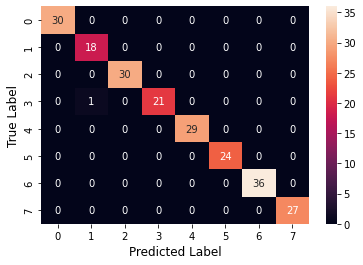

In [143]:
rf_confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [145]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, labels = [0, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      1.00      0.97        18

   micro avg       0.98      1.00      0.99        48
   macro avg       0.97      1.00      0.99        48
weighted avg       0.98      1.00      0.99        48

